# 1. Importação dos ficheiros e merge

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [ ]:
#data_labels_excel = pd.read_excel('Data_labels.xlsx', index_col=None)
#data_store_excel = pd.read_excel('Data_store.xlsx', index_col=None)

In [ ]:
#data_labels_excel.to_csv('data_labels.csv', index=False)
#data_store_excel.to_csv('data_store.csv', index=False)


In [ ]:
data_labels = pd.read_csv('data_labels.csv', low_memory=False)

data_store = pd.read_csv('data_store.csv')

In [ ]:
data_labels.head()

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold
0,1,1,Marca 1,4.22,2.11 (0.50),1,260,Card,16,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0
1,1,1,Marca 1,3.96,1.98 (0.50),1,260,,16,0.3168,0.005025,02/10/2021,2021-10-01,NaN,0.0
2,1,1,Marca 1,4.74,2.37 (0.50),1,260,Cash,16,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0
3,1,1,Marca 1,4.2,2.1 (0.50),1,260,Card,16,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0
4,1,1,Marca 1,4.62,2.31 (0.50),1,260,Cash,16,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN


In [ ]:
data_store.head()

,idstore,type,selling_square_ft,district
0,1,Large,4762.0,Évora
1,2,Large,12358.0,Bragança
2,3,Large,16159.0,Lisboa
3,4,Large,17903.0,Porto
4,5,Large,16179.0,Coimbra


In [ ]:
db = data_labels.merge(data_store, on = 'idstore' )

In [ ]:
db.head()

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district
0,1,1,Marca 1,4.22,2.11 (0.50),1,260,Card,16,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora
1,1,1,Marca 1,3.96,1.98 (0.50),1,260,,16,0.3168,0.005025,02/10/2021,2021-10-01,NaN,0.0,Large,4762.0,Évora
2,1,1,Marca 1,4.74,2.37 (0.50),1,260,Cash,16,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora
3,1,1,Marca 1,4.2,2.1 (0.50),1,260,Card,16,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora
4,1,1,Marca 1,4.62,2.31 (0.50),1,260,Cash,16,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN,Large,4762.0,Évora


# 2. Exploração inicial

Problemas detetados:

*   brand's com marcas iguais mas de forma diferente (Ex.: marca 1,  marca  1, Marca1, etc)
*   oldpvp com alguns valores separados por "," e outros por "."; sem duas casas decimais também
*   newpvp sem 2 casas decimais também
*   perc_expiring_sku com valores superiores a 1
*   expiring_date, labelling_date e selling date com formatos diferentes
*   payment_method tem valores nulos. Substituir por um valor






In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   idstore             150054 non-null  int64  
 1   sku                 150054 non-null  int64  
 2   brand               150054 non-null  object 
 3   oldpvp              150032 non-null  object 
 4   new_pvp (discount)  150026 non-null  object 
 5   labelqty            150054 non-null  int64  
 6   weight (g)          150050 non-null  object 
 7   Payment_method      150054 non-null  object 
 8   Margin (%)          150054 non-null  int64  
 9   Profit (€)          150054 non-null  float64
 10  perc_expiring_sku   149929 non-null  float64
 11  expiring_date       150054 non-null  object 
 12  labelling_date      150054 non-null  object 
 13  sell_date           80511 non-null   object 
 14  sold                149940 non-null  float64
 15  type                150054 non-nul

In [ ]:
db.columns

Index(['idstore', 'sku', 'brand', 'oldpvp', 'new_pvp (discount)', 'labelqty',
       'weight (g)', 'Payment_method', 'Margin (%)', 'Profit (€)',
       'perc_expiring_sku', 'expiring_date', 'labelling_date', 'sell_date',
       'sold', 'type', 'selling_square_ft', 'district'],
      dtype='object')

In [ ]:
db[db.duplicated()]

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district
36,7,2,Marca2,3.19,2.39 (0.25),1,222,,15,0.3585,0.111111,26/10/2021,2021-10-15,NaN,0.0,Large,13618.0,Guarda
39,7,2,Marca 2,3.19,2.39 (0.25),1,222,,15,0.3585,0.111111,26/10/2021,2021-10-15,NaN,0.0,Large,13618.0,Guarda
41,7,2,Marca 2,3.19,2.39 (0.25),1,222,,15,0.3585,0.111111,26/10/2021,2021-10-15,NaN,0.0,Large,13618.0,Guarda
42,7,2,Marca 2,3.19,2.39 (0.25),1,222,,15,0.3585,0.111111,26/10/2021,2021-10-15,NaN,0.0,Large,13618.0,Guarda
43,7,2,Marca 2,3.19,2.39 (0.25),1,222,,15,0.3585,0.111111,26/10/2021,2021-10-15,NaN,0.0,Large,13618.0,Guarda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150034,177,318,Marca2,2.49,"1,24 (50%)",1,97,,11,0.1364,0.006289,19-10-2021,2021-10-18,NaN,0.0,Small,842.0,Porto
150036,177,318,Marca 2,2.49,"1,24 (50%)",1,97,,11,0.1364,0.006289,19-10-2021,2021-10-18,NaN,0.0,Small,842.0,Porto
150038,177,318,Marca 2,2.49,"1,24 (50%)",1,97,,11,0.1364,0.006289,19-10-2021,2021-10-18,NaN,0.0,Small,842.0,Porto
150048,193,318,Marca 2,2.49,1.24 (0.50),1,97,Cash,11,0.1364,0.100629,19-10-2021,2021-10-03,2021-10-09,1.0,Medium,5048.0,Viseu


várias pessoas podem comprar o mesmo produto, na mesma loja, no mesmo dia, pelo que não iremos apagar os duplicados

## 2.1 Tratamento de problemas de formatação

### 2.1.1. Brand

In [ ]:
db['brand'].value_counts()

,count
brand,
marca 2,18249
Marca 2,17008
marca 2,9077
marca 2,9068
marca2,9043
...,...
Marca 37,1
Marca 37,1
marca 39,1


In [ ]:
db['brand'] = db['brand'].str.lower()
db['brand'] = db['brand'].str.replace(' ', '')
db['brand'].value_counts()

,count
brand,
marca2,106163
marca7,15428
marca15,12543
marca5,5418
marca12,1760
marca25,1279
marca9,1126
marca3,880
marca33,846


In [ ]:
db['brand'].value_counts()

,count
brand,
marca2,106163
marca7,15428
marca15,12543
marca5,5418
marca12,1760
marca25,1279
marca9,1126
marca3,880
marca33,846


In [ ]:
db['brand'].unique()

array(['marca1', 'marca2', 'marca3', 'marca4', 'marca5', 'marca6',
       'marca7', 'marca8', 'marca9', 'marca10', 'marca11', 'marca12',
       'marca13', 'marca14', 'marca15', 'marca16', 'marca17', 'marca18',
       'marca19', 'marca20', 'marca21', 'marca22', 'marca23', 'marca24',
       'marca25', 'marca26', 'marca27', 'marca28', 'marca29', 'marca30',
       'marca31', 'marca32', 'marca33', 'marca34', 'marca35', 'marca36',
       'marca37', 'marca38', 'marca39', 'marca40', 'marca41', 'marca42'],
      dtype=object)

### 2.1.2. Oldpvp

In [ ]:
db['oldpvp'] = db['oldpvp'].str.replace(',', '.')

In [ ]:
db['oldpvp'].unique()

array(['4.22', '3.96', '4.74', '4.2', '4.62', '3.42', '3.62', '4.38',
       '5.23', '5.89', '3.78', '4.76', '3.19', nan, '2.65', '2.79', '500',
       '46', '2.99', '1.39', '2.19', '1.19', '1.25', '3.99', '4.29',
       '1.99', '0.79', '1.29', '1.79', '1.15', '2.69', '2.49', '2.59',
       '4.39', '4.59', '1.49', '0.99', '4.99', '17.99', '2.39', '0.69',
       '0.76', '2.95', '1.59', '1.95', '1.89', '3.29', '2.80', '4.15',
       '1.69', '3.39', '3.24', '2.89', '1.75', '2.29', '999', '0.95',
       '1.54', '1.09', '3.49', '0.96', '0.98', '0.97', '1', '2.75',
       '1.05', '3.35', '0.89', '0.85', '1.55', '1.12', '1.47', '1.22',
       '1.71', '1.36', '1.68', '1.78', '1.5', '1.61', '1.33', '1.57',
       '1.26', '1.43', '1.08', '2.1', '0.91', '1.4', '2.03', '0.84',
       '0.94', '2.5', '2.50', '2.09', '14.99', '0.59', '1.65', '3.8',
       '2.45', '4.89', '3.09', '1.9', '1.44'], dtype=object)

In [ ]:
db['oldpvp'] = db['oldpvp'].astype(float).round(2)

### 2.1.3. New_pvp

In [ ]:
db[['new_pvp', 'discount']] = db['new_pvp (discount)'].str.split('(', expand=True)
db['new_pvp'] = db['new_pvp'].str.strip()
db['discount'] = db['discount'].str.rstrip(')')

In [ ]:
db.head()

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount
0,1,1,marca1,4.22,2.11 (0.50),1,260,Card,16,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.50
1,1,1,marca1,3.96,1.98 (0.50),1,260,,16,0.3168,0.005025,02/10/2021,2021-10-01,NaN,0.0,Large,4762.0,Évora,1.98,0.50
2,1,1,marca1,4.74,2.37 (0.50),1,260,Cash,16,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.50
3,1,1,marca1,4.20,2.1 (0.50),1,260,Card,16,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.1,0.50
4,1,1,marca1,4.62,2.31 (0.50),1,260,Cash,16,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN,Large,4762.0,Évora,2.31,0.50


In [ ]:
db['new_pvp'] = db['new_pvp'].str.replace(',', '.')
db['new_pvp'] = db['new_pvp'].astype(float).round(2)

In [ ]:
def convert_discount(discount_str):
    if isinstance(discount_str, str):
        if '%' in discount_str:
            try:
                return float(discount_str.replace('%', '')) / 100
            except ValueError:
                return np.nan
        elif discount_str == 'nan':
            return np.nan
        else:
          try:
            return float(discount_str)
          except:
            return np.nan
    elif pd.isna(discount_str):
      return np.nan
    else:
        return discount_str

db['discount'] = db['discount'].apply(convert_discount)
db['discount'] = db['discount'].astype(float).round(2)

In [ ]:
db = db.drop('new_pvp (discount)', axis=1)

In [ ]:
db['discount'].describe()

,discount
count,150026.000000
mean,0.302269
std,0.036940
min,0.010000
25%,0.300000
50%,0.300000
75%,0.300000
max,0.990000


In [ ]:
db.columns

Index(['idstore', 'sku', 'brand', 'oldpvp', 'labelqty', 'weight (g)',
       'Payment_method', 'Margin (%)', 'Profit (€)', 'perc_expiring_sku',
       'expiring_date', 'labelling_date', 'sell_date', 'sold', 'type',
       'selling_square_ft', 'district', 'new_pvp', 'discount'],
      dtype='object')

### 2.1.4. Profit (€)

In [ ]:
db['Profit (€)'] = db['Profit (€)'].astype(float).round(2)

### 2.1.5. Margin (%)

In [ ]:
db['Margem_num']=db['Margin (%)']/100
db = db.drop('Margin (%)', axis=1)

In [ ]:
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num
0,1,1,marca1,4.22,1,260,Card,0.34,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5,0.16
1,1,1,marca1,3.96,1,260,,0.32,0.005025,02/10/2021,2021-10-01,NaN,0.0,Large,4762.0,Évora,1.98,0.5,0.16
2,1,1,marca1,4.74,1,260,Cash,0.38,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5,0.16
3,1,1,marca1,4.20,1,260,Card,0.34,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5,0.16
4,1,1,marca1,4.62,1,260,Cash,0.37,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN,Large,4762.0,Évora,2.31,0.5,0.16


### 2.1.6. perc_expiring_sku

In [ ]:
db['perc_expiring_sku'].unique()

array([0.01005025, 0.00502513, 0.12121212, 0.11111111, 0.1010101 ,
       0.04040404, 0.06060606, 0.13131313, 0.25      , 0.        ,
       0.5       , 0.14285714, 0.125     , 0.66666667, 0.33333333,
       0.2       , 0.4       , 0.34482759, 0.37931034, 0.0754717 ,
       0.12578616, 0.06289308, 0.03351955, 0.02892562, 0.0292887 ,
       0.0334728 , 1.        , 0.05405405, 0.0472973 , 0.03378378,
       0.08264463, 0.05050505, 0.00413223, 0.09090909, 0.08176101,
       0.02515723, 0.02479339,        nan, 0.01515152, 0.06818182,
       0.08333333, 0.07575758, 0.1875    , 0.08080808, 0.03144654,
       0.04469274, 0.03910615, 0.16      , 0.28      , 0.32      ,
       0.09352518, 0.07913669, 0.01438849, 0.08633094, 0.05035971,
       0.05755396, 0.18461538, 0.03076923, 0.01538462, 0.16923077,
       0.06918239, 0.03773585, 0.06703911, 0.0726257 , 0.02234637,
       0.01675978, 0.04545455, 0.01886792, 0.05660377, 0.03305785,
       0.07878788, 0.07272727, 0.13836478, 0.01257862, 0.10062

Após análise verificámos que existem valores incorrectos (>1) no per_expering_sku. Estes valores estão associados a 2 tipos de Sku (122 e 134). Desta forma decidimos alterar o per_expering_sku pela média de todos os produtos. Não foi possível fazer a média por produto, visto que todas as observações destes sku's estavam mapeadas com valores incorrectos.

In [ ]:
# Para db['perc_expiring_sku'] acima de 1, substituímo-los pela média da coluna
mean_perc_expiring_sku = db[db['perc_expiring_sku'] <= 1]['perc_expiring_sku'].mean()
db.loc[db['perc_expiring_sku'] > 1, 'perc_expiring_sku'] = mean_perc_expiring_sku

In [ ]:
db['perc_expiring_sku'].describe()

,perc_expiring_sku
count,149929.000000
mean,0.384977
std,0.222661
min,0.000000
25%,0.200000
50%,0.333333
75%,0.666667
max,1.000000


### 2.1.7. Expiring_date, labelling_date, sell_date

In [ ]:
# Replace '-' with '/' in 'expiring_date', 'labelling_date', and 'sell_date' columns
for col in ['expiring_date', 'labelling_date', 'sell_date']:
    if col in db.columns:  # Check if the column exists
        db[col] = db[col].astype(str).str.replace('-', '/', regex=False)


In [ ]:
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num
0,1,1,marca1,4.22,1,260,Card,0.34,0.010050,03/10/2021,2021/10/01,2021/10/02,1.0,Large,4762.0,Évora,2.11,0.5,0.16
1,1,1,marca1,3.96,1,260,,0.32,0.005025,02/10/2021,2021/10/01,nan,0.0,Large,4762.0,Évora,1.98,0.5,0.16
2,1,1,marca1,4.74,1,260,Cash,0.38,0.010050,03/10/2021,2021/10/01,2021/10/03,1.0,Large,4762.0,Évora,2.37,0.5,0.16
3,1,1,marca1,4.20,1,260,Card,0.34,0.010050,03/10/2021,2021/10/01,2021/10/02,1.0,Large,4762.0,Évora,2.10,0.5,0.16
4,1,1,marca1,4.62,1,260,Cash,0.37,0.010050,03/10/2021,2021/10/01,2021/10/03,NaN,Large,4762.0,Évora,2.31,0.5,0.16


In [ ]:
def convert_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    elif isinstance(date_str, str):
        try:
            return pd.to_datetime(date_str, format='%Y/%m/%d', errors='raise')
        except ValueError:
            try:
                return pd.to_datetime(date_str, format='%d/%m/%Y', errors='raise')
            except ValueError:
              try:
                return pd.to_datetime(date_str, format='%m/%d/%Y', errors='raise')
              except ValueError:
                return pd.NaT # Return Not a Time if format is invalid
    return pd.NaT

for col in ['expiring_date', 'labelling_date', 'sell_date']:
    if col in db.columns:
        db[col] = db[col].apply(convert_date)
        db[col] = db[col].dt.strftime('%Y/%m/%d')


In [ ]:
# Convert 'labelling_date' and 'sell_date' to datetime objects
db['labelling_date'] = pd.to_datetime(db['labelling_date'])
db['expiring_date'] = pd.to_datetime(db['expiring_date'])
db['sell_date'] = pd.to_datetime(db['sell_date'])

In [ ]:
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num
0,1,1,marca1,4.22,1,260,Card,0.34,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5,0.16
1,1,1,marca1,3.96,1,260,,0.32,0.005025,2021-10-02,2021-10-01,NaT,0.0,Large,4762.0,Évora,1.98,0.5,0.16
2,1,1,marca1,4.74,1,260,Cash,0.38,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5,0.16
3,1,1,marca1,4.20,1,260,Card,0.34,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5,0.16
4,1,1,marca1,4.62,1,260,Cash,0.37,0.010050,2021-10-03,2021-10-01,2021-10-03,NaN,Large,4762.0,Évora,2.31,0.5,0.16


### 2.1.8. Sold

In [ ]:
db['sold']=db['sold'].astype(bool)

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   idstore            150054 non-null  int64         
 1   sku                150054 non-null  int64         
 2   brand              150054 non-null  object        
 3   oldpvp             150032 non-null  float64       
 4   labelqty           150054 non-null  int64         
 5   weight (g)         150050 non-null  object        
 6   Payment_method     150054 non-null  object        
 7   Profit (€)         150054 non-null  float64       
 8   perc_expiring_sku  149929 non-null  float64       
 9   expiring_date      150054 non-null  datetime64[ns]
 10  labelling_date     150054 non-null  datetime64[ns]
 11  sell_date          80511 non-null   datetime64[ns]
 12  sold               150054 non-null  bool          
 13  type               150054 non-null  object  

In [ ]:
db['sold'].value_counts()

,count
sold,
True,80567
False,69487


In [ ]:
# Verificar se existem produtos com sell date e sold = 0
filtered_db_sellnulo = db[db['sell_date'] != "nan"]
filtered_db_sellnulo

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num
0,1,1,marca1,4.22,1,260,Card,0.34,0.010050,2021-10-03,2021-10-01,2021-10-02,True,Large,4762.0,Évora,2.11,0.5,0.16
1,1,1,marca1,3.96,1,260,,0.32,0.005025,2021-10-02,2021-10-01,NaT,False,Large,4762.0,Évora,1.98,0.5,0.16
2,1,1,marca1,4.74,1,260,Cash,0.38,0.010050,2021-10-03,2021-10-01,2021-10-03,True,Large,4762.0,Évora,2.37,0.5,0.16
3,1,1,marca1,4.20,1,260,Card,0.34,0.010050,2021-10-03,2021-10-01,2021-10-02,True,Large,4762.0,Évora,2.10,0.5,0.16
4,1,1,marca1,4.62,1,260,Cash,0.37,0.010050,2021-10-03,2021-10-01,2021-10-03,True,Large,4762.0,Évora,2.31,0.5,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150049,193,318,marca2,2.49,1,97,,0.14,0.100629,2021-10-19,2021-10-03,NaT,False,Medium,5048.0,Viseu,1.24,0.5,0.11
150050,203,318,marca2,2.49,1,97,Cash,0.14,0.113208,2021-10-19,2021-10-01,2021-10-02,True,Medium,9370.0,Faro,1.24,0.5,0.11
150051,203,318,marca2,2.49,1,97,Cash,0.14,0.113208,2021-10-19,2021-10-01,2021-10-02,True,Medium,9370.0,Faro,1.24,0.5,0.11
150052,139,319,marca24,3.49,1,141,Cash,0.46,0.092437,2021-10-17,2021-10-06,2021-10-11,True,Small,1061.0,Portalegre,2.44,0.3,0.19


In [ ]:
filtered_db_sellnulo['sold'].value_counts()
# Todos os produtos que têm sell date, têm o sold =True

,count
sold,
True,80567
False,69487


In [ ]:
filtered_db_sellvalue = db[db['sell_date'] == "nan"]
filtered_db_sellvalue

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num


In [ ]:
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num
0,1,1,marca1,4.22,1,260,Card,0.34,0.010050,2021-10-03,2021-10-01,2021-10-02,True,Large,4762.0,Évora,2.11,0.5,0.16
1,1,1,marca1,3.96,1,260,,0.32,0.005025,2021-10-02,2021-10-01,NaT,False,Large,4762.0,Évora,1.98,0.5,0.16
2,1,1,marca1,4.74,1,260,Cash,0.38,0.010050,2021-10-03,2021-10-01,2021-10-03,True,Large,4762.0,Évora,2.37,0.5,0.16
3,1,1,marca1,4.20,1,260,Card,0.34,0.010050,2021-10-03,2021-10-01,2021-10-02,True,Large,4762.0,Évora,2.10,0.5,0.16
4,1,1,marca1,4.62,1,260,Cash,0.37,0.010050,2021-10-03,2021-10-01,2021-10-03,True,Large,4762.0,Évora,2.31,0.5,0.16


### 2.1.9. Payment_method

In [ ]:
db['Payment_method'] = db['Payment_method'].replace(r'^\s*$', 'not_sell', regex=True)


In [ ]:
db['Payment_method'].value_counts()

,count
Payment_method,
not_sell,69543
Card,40398
Cash,40113


### 2.1.10. District

In [ ]:
db['district'].unique()

array(['Évora', 'Bragança', 'Lisboa', 'Porto', 'Coimbra', 'Guarda',
       'Vila Real', 'Faro', 'Beja', 'Leiria', 'Viana do Castelo',
       'Castelo Branco', 'Santarém', 'Setúbal', 'Portalegre', 'Aveiro',
       'Braga', 'Viseu'], dtype=object)

### 2.1.11. Weight (g)

In [ ]:
# Convert 'weight (g)' to float64
db['weight (g)'] = pd.to_numeric(db['weight (g)'], errors='coerce').astype('float64')


### 2.1.12. IdStore

In [ ]:
db['idstore'] = db['idstore'].astype('object')

### 2.1.13. Sku

In [ ]:
db['sku'] = db['sku'].astype('object')

In [ ]:
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num
0,1,1,marca1,4.22,1,260.0,Card,0.34,0.010050,2021-10-03,2021-10-01,2021-10-02,True,Large,4762.0,Évora,2.11,0.5,0.16
1,1,1,marca1,3.96,1,260.0,not_sell,0.32,0.005025,2021-10-02,2021-10-01,NaT,False,Large,4762.0,Évora,1.98,0.5,0.16
2,1,1,marca1,4.74,1,260.0,Cash,0.38,0.010050,2021-10-03,2021-10-01,2021-10-03,True,Large,4762.0,Évora,2.37,0.5,0.16
3,1,1,marca1,4.20,1,260.0,Card,0.34,0.010050,2021-10-03,2021-10-01,2021-10-02,True,Large,4762.0,Évora,2.10,0.5,0.16
4,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,2021-10-01,2021-10-03,True,Large,4762.0,Évora,2.31,0.5,0.16


## 2.2. Exploração Estatística

In [ ]:
db_numeric = db.select_dtypes(include=np.number)
db_categoric = db.select_dtypes(include='object')
db_dates = db.select_dtypes(include='datetime64')

### 2.2.1. Variáveis Numéricas

In [ ]:
db_numeric.describe()

,oldpvp,labelqty,weight (g),Profit (€),perc_expiring_sku,selling_square_ft,new_pvp,discount,Margem_num
count,150032.000000,150054.0,149626.000000,150054.000000,149929.000000,139275.000000,150026.000000,150026.000000,150054.000000
mean,1.583495,1.0,163.482369,0.175200,0.384977,5978.197487,1.100699,0.302269,0.158249
std,2.936689,0.0,57.755830,0.268484,0.222661,5533.809602,1.491332,0.036940,0.033036
min,0.590000,1.0,1.000000,0.030000,0.000000,10.000000,0.030000,0.010000,0.100000
25%,1.190000,1.0,123.000000,0.120000,0.200000,1218.000000,0.830000,0.300000,0.130000
50%,1.590000,1.0,167.000000,0.150000,0.333333,4982.000000,1.110000,0.300000,0.170000
75%,1.890000,1.0,192.000000,0.220000,0.666667,8671.000000,1.320000,0.300000,0.190000
max,999.000000,1.0,410.000000,99.900000,1.000000,25258.000000,499.500000,0.990000,0.200000


**ALTERAR**
From the above table, we can get some conclusions. Some examples are:
- `count`- The income variable has 2431 valid values. We have a problem of missing values in here.
- `mean`- In average, my customers spent on my store 654 monetary units;
- `std`- The standard deviation of Income is quite high. This indicates that the values are spread out over a wider range.
- `min`- All the customers have bought in my store at least 3 times.
- `50%`- Half of my customers spend till 402 monetary units on my store.
- `max`- The maximum value for recommendation is 6. This is an incoherence - according to the business needs, the range is between 1 and 5.

The `describe()` method provides the main descriptive statistics: count, mean, standard deviation, minimum value, 25 percentile, 50 percentile or median, 75 percentile and maximum value.
<br>
However, you can call directly other measures, such as the skewness or the kurtosis.

In [ ]:
db_numeric.skew()

,0
oldpvp,293.769518
labelqty,0.000000
weight (g),0.524027
Profit (€),341.546171
perc_expiring_sku,0.205440
selling_square_ft,1.091003
new_pvp,279.813269
discount,3.291943
Margem_num,-0.374411



*  possibilidade de grandes outliers em oldpvp, profit e new_pvp;
*  discount também com alguma possibilidade (um pouco acima de 1) e selling talvez mas pouco



In [ ]:
db_numeric.kurt()

,0
oldpvp,94225.456797
labelqty,0.000000
weight (g),2.306941
Profit (€),126853.607828
perc_expiring_sku,-0.423220
selling_square_ft,0.693269
new_pvp,88319.704828
discount,24.133569
Margem_num,-1.260135




*   oldpvp, profit, new_pvp com kurt superior a 3, indicando uma distribuição bastante anormal, todas positivas e com a cauda para a direita




### 2.2.2. Variáveis Categóricas

In [ ]:
db_categoric.describe()

,idstore,sku,brand,Payment_method,type,district
count,150054,150054,150054,150054,150054,150054
unique,332,319,42,3,4,18
top,217,227,marca2,not_sell,Medium,Lisboa
freq,2443,8971,106163,69543,62590,14888


#### Payment_method

In [ ]:
db['Payment_method'].value_counts()

,count
Payment_method,
not_sell,69543
Card,40398
Cash,40113


In [ ]:
# Verificar se quando o Payment_method está vazio, se existe uma sell_date
empty_payment_with_sell_date = db[(db['Payment_method'].isnull()) & (db['sell_date'].notnull())]
empty_payment_with_sell_date

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num


#### Type

In [ ]:
db['type'].value_counts()

,count
type,
Medium,62590
Small,60599
Large,26219
0,646


#### District

In [ ]:
db['district'].value_counts()

,count
district,
Lisboa,14888
Porto,12018
Coimbra,10694
Braga,10050
Guarda,9699
Viana do Castelo,8943
Aveiro,8650
Viseu,8421
Castelo Branco,7770


## 2.3. Exploração Visual

### 2.3.1 Variáveis Numéricas

In [ ]:
db_numeric.columns

Index(['oldpvp', 'labelqty', 'weight (g)', 'Profit (€)', 'perc_expiring_sku',
       'selling_square_ft', 'new_pvp', 'discount', 'Margem_num'],
      dtype='object')

#### Correlação

<Axes: >

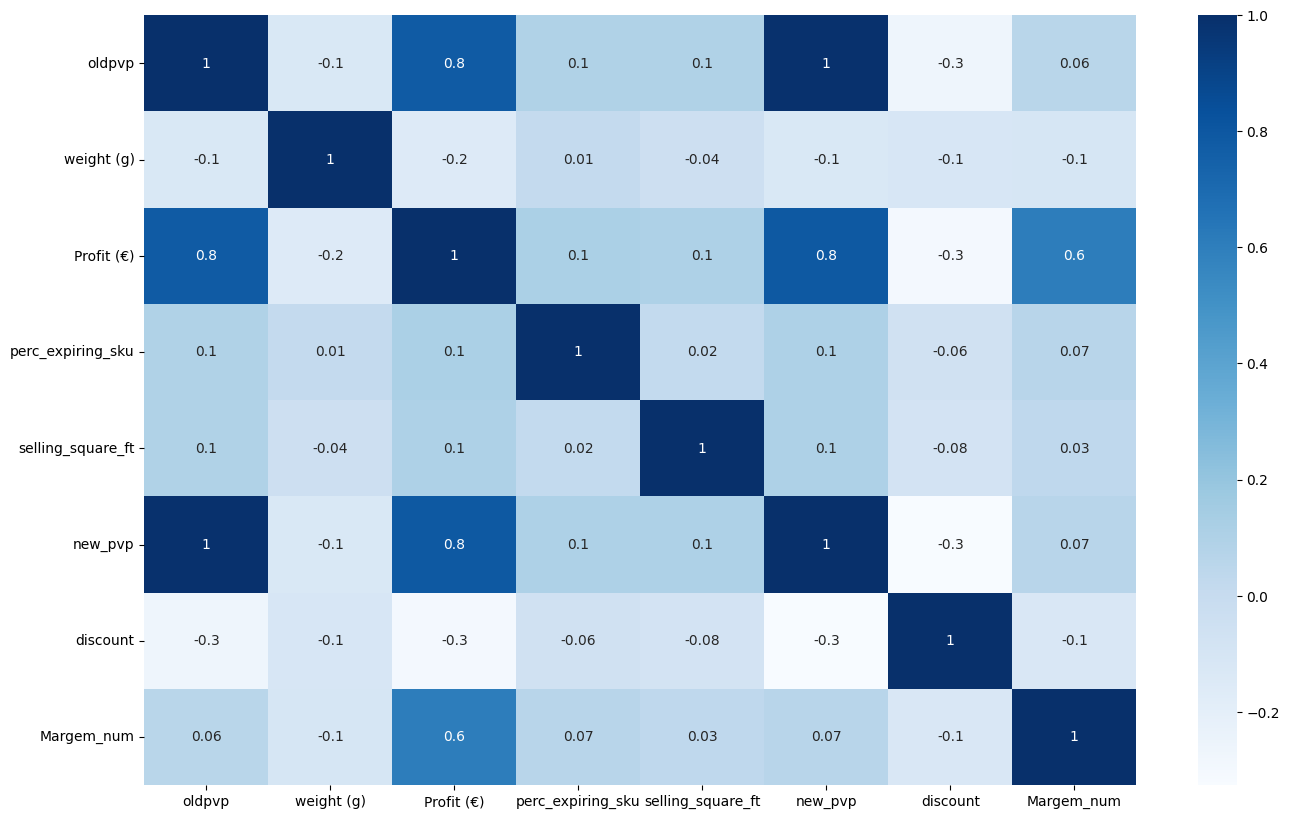

In [ ]:
db_numeric = db_numeric.drop(columns=['labelqty'])
db_numeric_corr = db_numeric.corr(method = 'spearman',numeric_only=True)
figure = plt.figure(figsize=(16,10))
sns.heatmap(db_numeric_corr, annot=True, fmt = '.1g',cmap='Blues')

#### Distribuição das Variáveis Numéricas

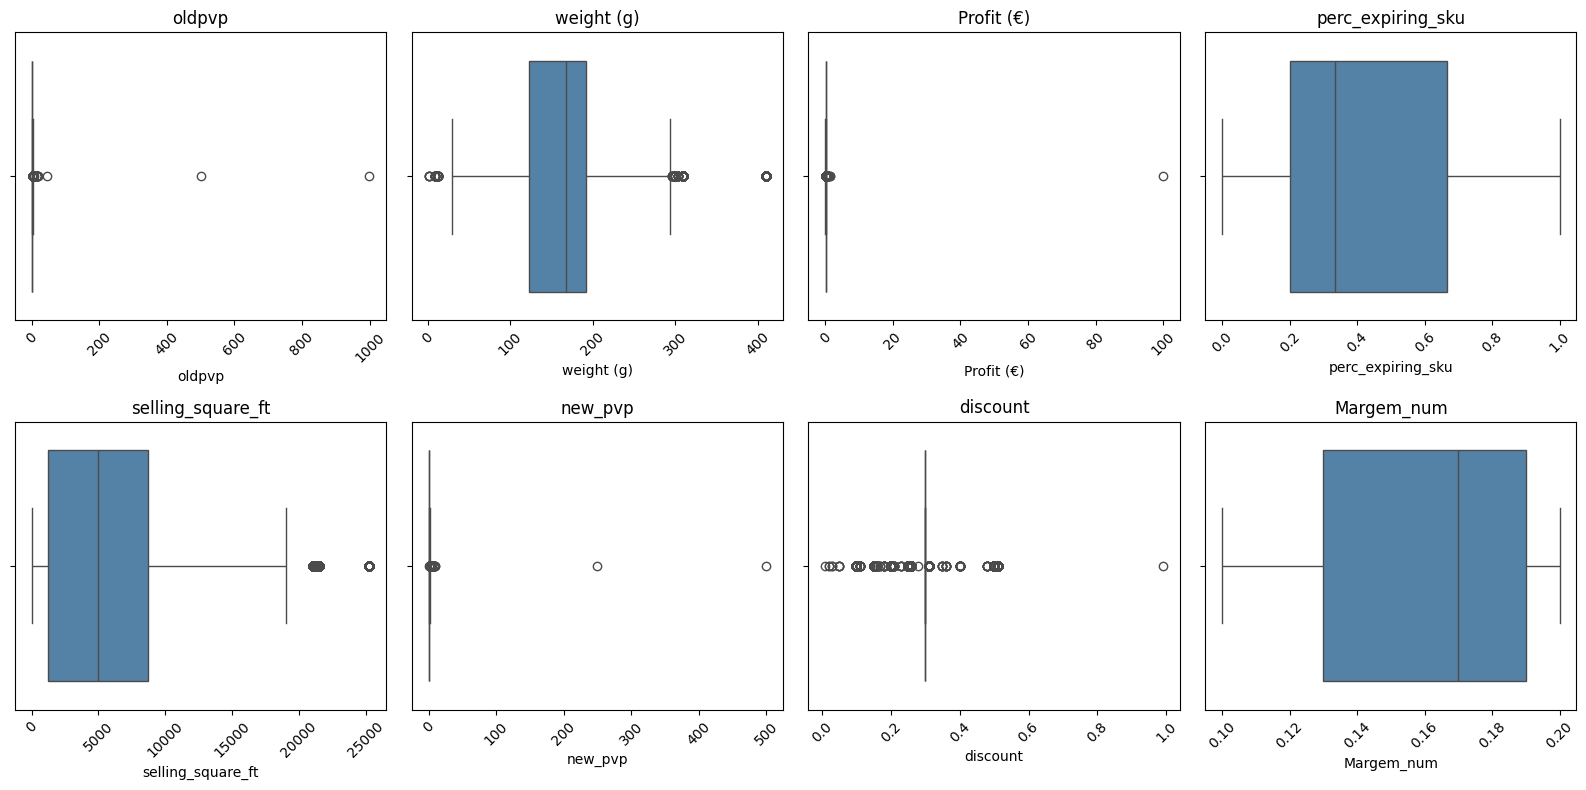

In [ ]:
#Box plot para as numéricas

#Selecicionar apenas as variáveis numéricas
numerical_cols = db_numeric.select_dtypes(include=np.number).columns
num_plots = len(numerical_cols)

# Definir número de colunas e calcular número de linhas
plots_per_row = 4
num_rows = int(np.ceil(num_plots / plots_per_row))

#Criar subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 4, num_rows * 4))

axes = axes.flatten()

#Criar boxplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=db[col], ax=axes[i], color='steelblue')
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Remover eixos vazios (se houver)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

#Adjustar layout
plt.tight_layout()
plt.show()

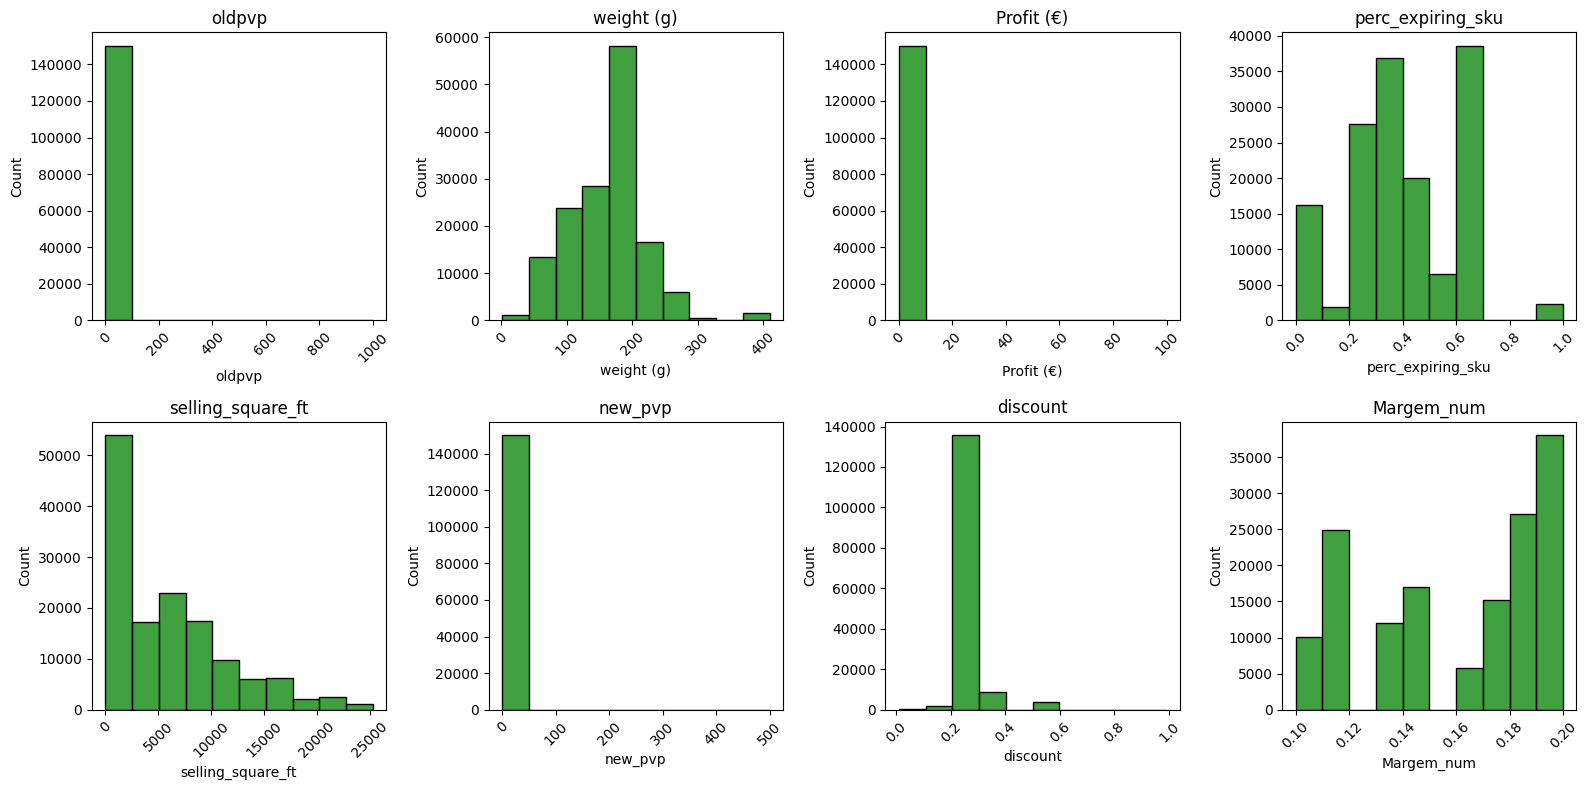

In [ ]:
# Selecionar apenas as variáveis numéricas
numerical_cols = db_numeric.select_dtypes(include=np.number).columns
num_plots = len(numerical_cols)

# Definir número de colunas e calcular número de linhas
plots_per_row = 4
num_rows = int(np.ceil(num_plots / plots_per_row))

# Criar subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 4, num_rows * 4))
axes = axes.flatten()

# Criar histogramas
for i, col in enumerate(numerical_cols):
    sns.histplot(data=db, x=col, bins=10, color='g', ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Remover eixos vazios (se houver)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar layout
plt.tight_layout()
plt.show()



Nota:

Com base na análise dos boxplots e histogramas, observou-se a presença de outliers significativos nas variáveis oldpvp, Profit (€) e new_pvp. Esses valores extremos podem influenciar métricas estatísticas e distorcer interpretações, sendo que iremos tratá-los posteriormente.

#### Relação entre perc_expiring_sku e discount

<Axes: xlabel='perc_expiring_sku', ylabel='discount'>

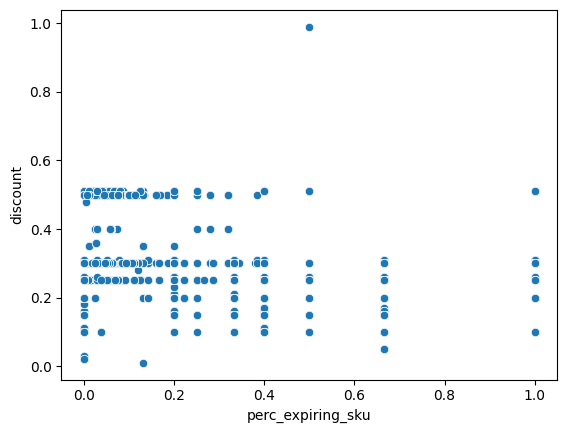

In [ ]:
sns.scatterplot(data = db, x = 'perc_expiring_sku', y= 'discount')

### 2.3.2 Variáveis Categóricas

In [ ]:
db_categoric.columns

Index(['idstore', 'sku', 'brand', 'Payment_method', 'type', 'district'], dtype='object')

<Axes: xlabel='count', ylabel='district'>

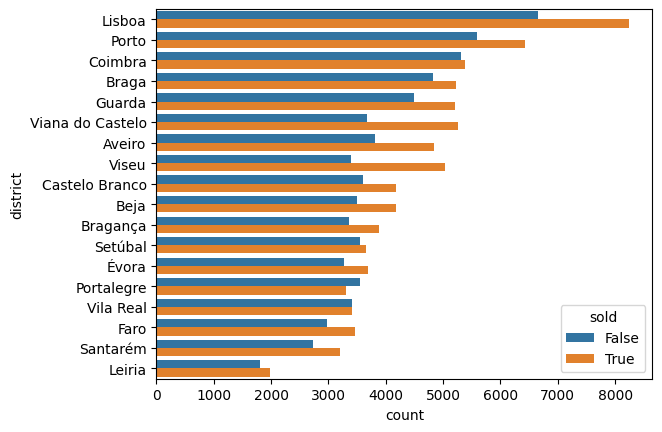

In [ ]:
sns.countplot(y = 'district', hue = 'sold', data = db, order=db['district'].value_counts().index)

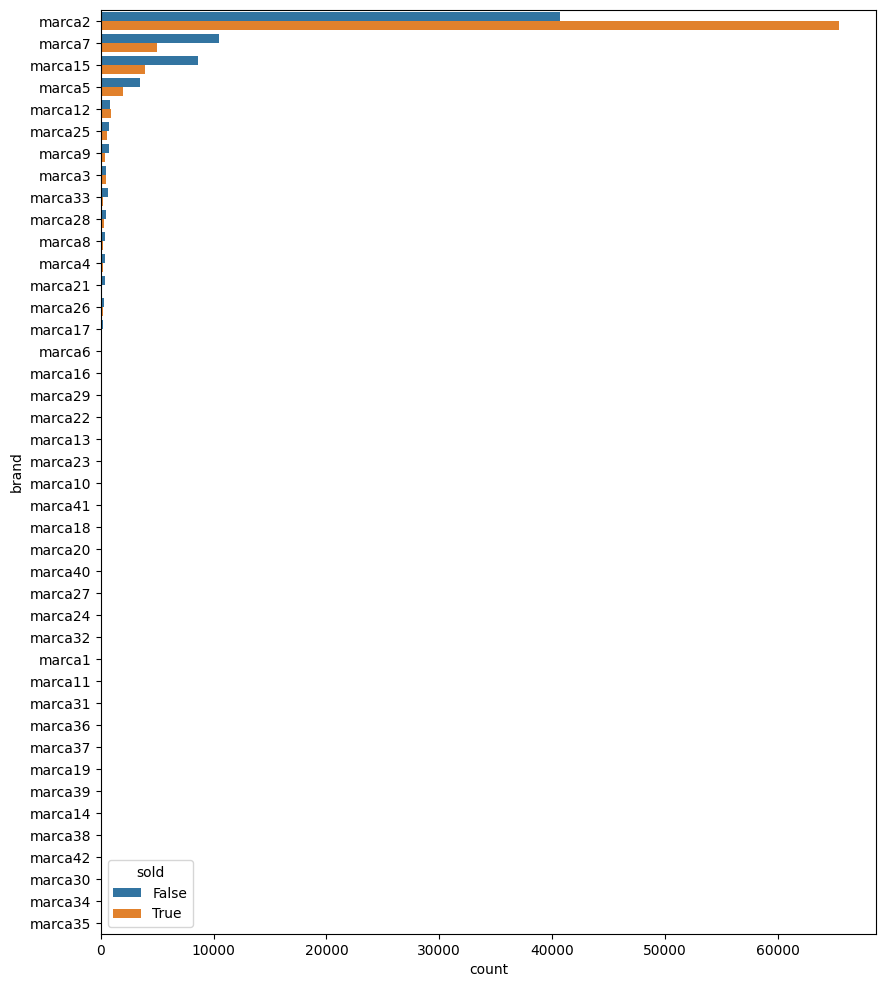

In [ ]:
plt.figure(figsize=(10, 12))
sns.countplot(y = 'brand', hue = 'sold', data = db, order=db['brand'].value_counts().index)
plt.show()

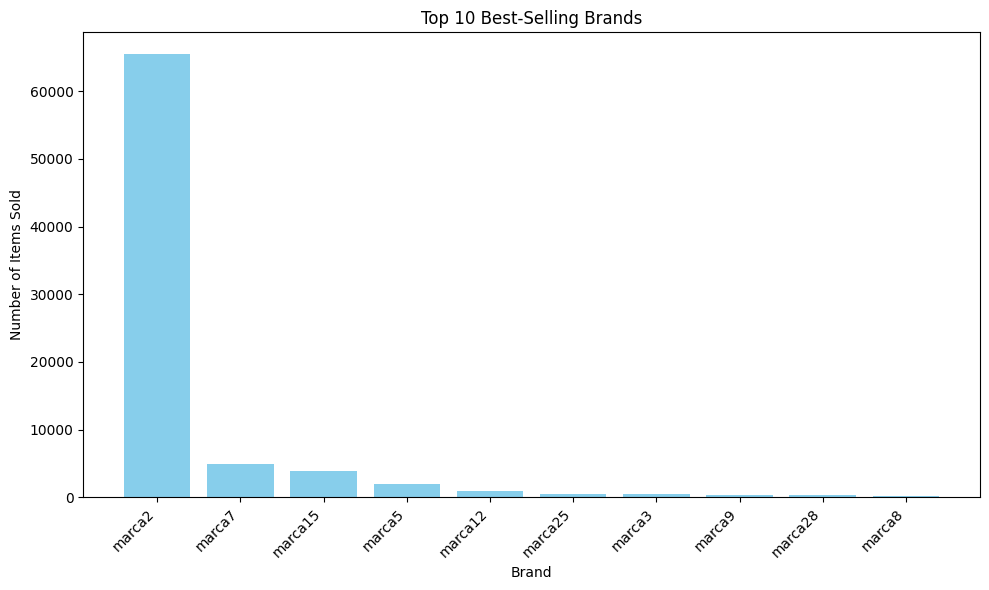

In [ ]:
sold_items = db[db['sold'] == 1]
top_brands = sold_items['brand'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
plt.bar(top_brands.index, top_brands.values, color='skyblue')
plt.xlabel("Brand")
plt.ylabel("Number of Items Sold")
plt.title("Top 10 Best-Selling Brands")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
sold_items = db[db['sold'] == 1]

top_artigos = (
    sold_items['sku']
    .value_counts(ascending=False)
    .head(20)
    .reset_index()
)
top_artigos.columns = ['sku', 'Quantidade']
top_artigos = top_artigos.sort_values('Quantidade', ascending=False)
top_artigos

,sku,Quantidade
0,227,6902
1,105,5158
2,8,3588
3,198,3482
4,99,3430
5,251,3383
6,293,3030
7,302,2859
8,200,2845
9,139,2789


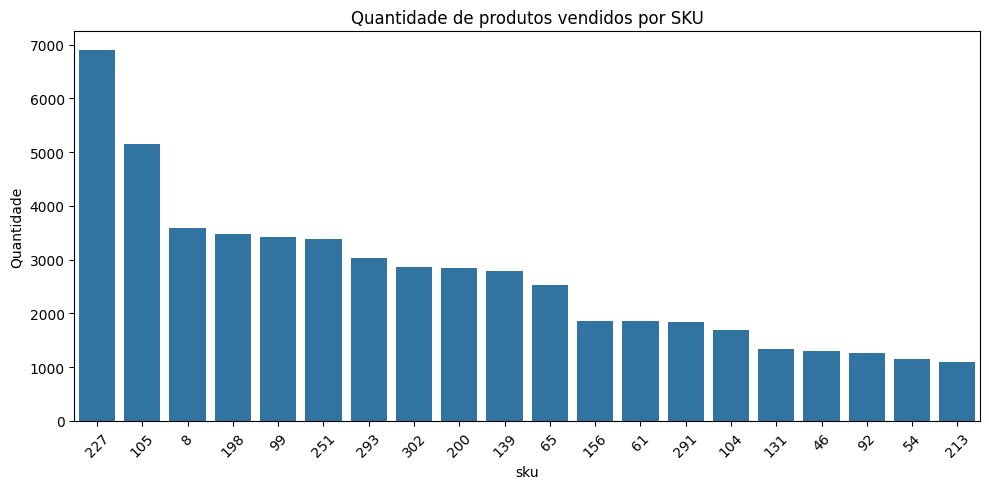

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="sku", y="Quantidade", data=top_artigos, order=top_artigos['sku'])
plt.title("Quantidade de produtos vendidos por SKU")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Selling_day

In [ ]:
db['selling_day'] = db['sell_date'].dt.day
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day
0,1,1,marca1,4.22,1,260.0,Card,0.34,0.010050,2021-10-03,2021-10-01,2021-10-02,True,Large,4762.0,Évora,2.11,0.5,0.16,2.0
1,1,1,marca1,3.96,1,260.0,not_sell,0.32,0.005025,2021-10-02,2021-10-01,NaT,False,Large,4762.0,Évora,1.98,0.5,0.16,NaN
2,1,1,marca1,4.74,1,260.0,Cash,0.38,0.010050,2021-10-03,2021-10-01,2021-10-03,True,Large,4762.0,Évora,2.37,0.5,0.16,3.0
3,1,1,marca1,4.20,1,260.0,Card,0.34,0.010050,2021-10-03,2021-10-01,2021-10-02,True,Large,4762.0,Évora,2.10,0.5,0.16,2.0
4,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,2021-10-01,2021-10-03,True,Large,4762.0,Évora,2.31,0.5,0.16,3.0


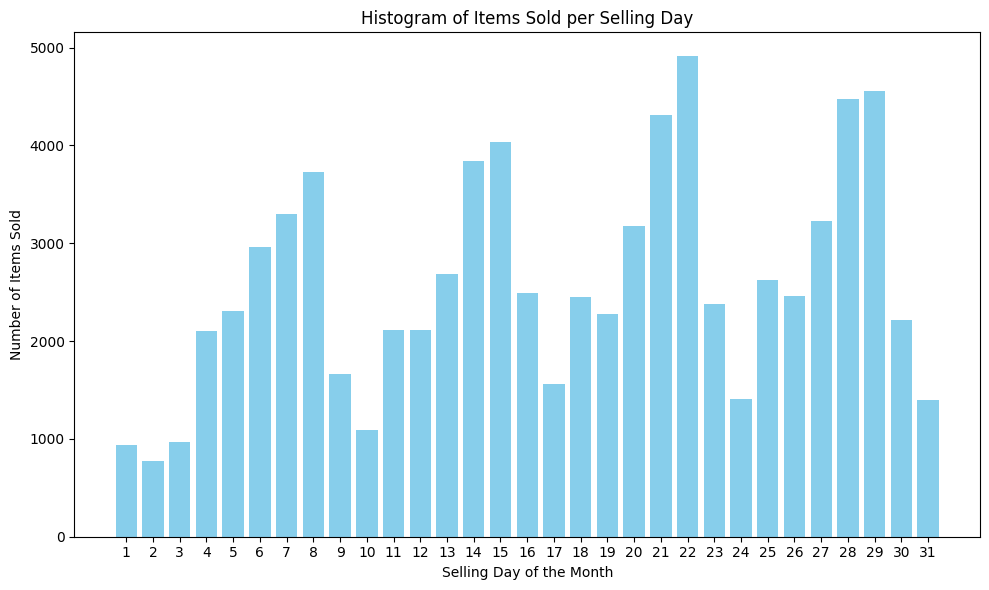

In [ ]:
sold_counts_by_day = db[db['sold'] == 1].groupby('selling_day')['sold'].count()
plt.figure(figsize=(10, 6))
plt.bar(sold_counts_by_day.index, sold_counts_by_day.values, color='skyblue')
plt.xlabel("Selling Day of the Month")
plt.ylabel("Number of Items Sold")
plt.title("Histogram of Items Sold per Selling Day")
plt.xticks(sold_counts_by_day.index)
plt.tight_layout()
plt.show()


#### Selling_day_of_week

In [ ]:
db['selling_day_of_week'] = db['sell_date'].dt.day_name()
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
0,1,1,marca1,4.22,1,260.0,Card,0.34,0.010050,2021-10-03,...,2021-10-02,True,Large,4762.0,Évora,2.11,0.5,0.16,2.0,Saturday
1,1,1,marca1,3.96,1,260.0,not_sell,0.32,0.005025,2021-10-02,...,NaT,False,Large,4762.0,Évora,1.98,0.5,0.16,NaN,NaN
2,1,1,marca1,4.74,1,260.0,Cash,0.38,0.010050,2021-10-03,...,2021-10-03,True,Large,4762.0,Évora,2.37,0.5,0.16,3.0,Sunday
3,1,1,marca1,4.20,1,260.0,Card,0.34,0.010050,2021-10-03,...,2021-10-02,True,Large,4762.0,Évora,2.10,0.5,0.16,2.0,Saturday
4,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,...,2021-10-03,True,Large,4762.0,Évora,2.31,0.5,0.16,3.0,Sunday


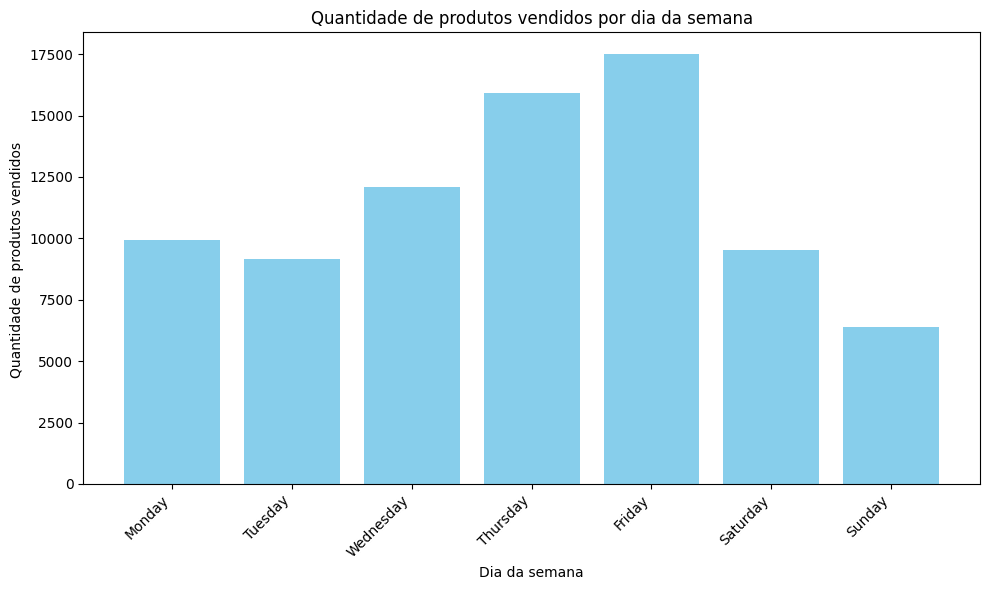

In [ ]:
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sold_counts_by_day_of_week = (
    db[db['sold'] == 1]
    .groupby('selling_day_of_week')['sold']
    .count()
    .reindex(dias_ordem)
)
plt.figure(figsize=(10, 6))
plt.bar(sold_counts_by_day_of_week.index, sold_counts_by_day_of_week.values, color='skyblue')
plt.xlabel("Dia da semana")
plt.ylabel("Quantidade de produtos vendidos ")
plt.title("Quantidade de produtos vendidos por dia da semana")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 3. Data Cleaning

## 3.1 Outliers

Com base na kurtosis, reparámos que deviamos prestar especial atenção a estes: oldpvp, profit, new_pvp, discount com kurt superior a 3, indicando uma distribuição bastante anormal, todas positivas e com a cauda para a direita

### oldpvp

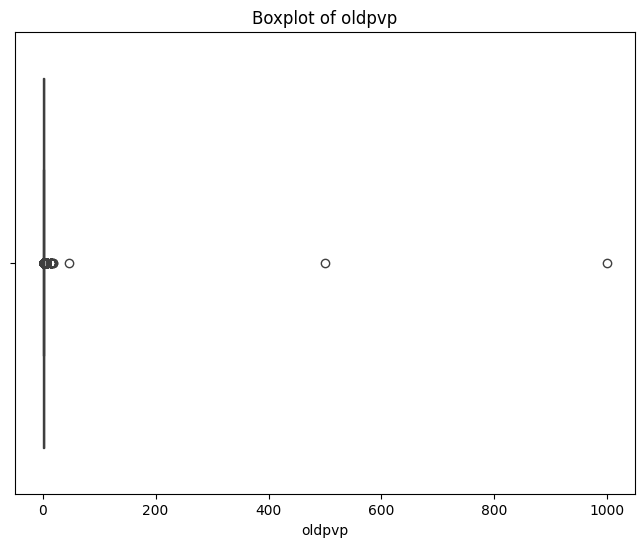

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=db['oldpvp'])
plt.title('Boxplot of oldpvp')
plt.show()

#### Oldpvp > 400

In [ ]:
filtered_db = db[db['oldpvp'] > 400]
filtered_db

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
452,64,4,marca3,500.0,1,134.0,Card,0.33,0.250000,2021-10-30,...,2021-10-29,True,Medium,7879.0,Santarém,250.0,0.5,0.17,29.0,Friday
50171,289,108,marca20,999.0,1,227.0,not_sell,99.90,0.101266,2021-10-10,...,NaT,False,Small,342.0,Viana do Castelo,499.5,0.5,0.20,NaN,NaN


##### Sku = 108

In [ ]:
avg_oldpvp_sku108 = db[db['sku'] == 108]['oldpvp'].mean()
print(f"Average 'oldpvp' for SKU 108: {avg_oldpvp_sku108}")


Average 'oldpvp' for SKU 108: 999.0


In [ ]:
display(db[db['sku'] == 108])


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
50171,289,108,marca20,999.0,1,227.0,not_sell,99.9,0.101266,2021-10-10,...,NaT,False,Small,342.0,Viana do Castelo,499.5,0.5,0.2,NaN,NaN


Uma vez que só existe um valor com deste produto (SKU), vamos eliminar esta linha, pois distorce a distribuição dos valores e aparenta ser um erro - etiquetas cor-de-rosa são geralmente aplicadas a produtos perecíveis e não parece que um produto deste género (preço) possa ter um valor tão elevado

In [ ]:
db = db[db['sku'] != 108]

##### sku=4

In [ ]:
avg_oldpvp_sku4 = db[db['sku'] == 4]['oldpvp'].mean()
print(f"Average 'oldpvp' for SKU 4: {avg_oldpvp_sku4}")

Average 'oldpvp' for SKU 4: 3.975131578947368


In [ ]:
average_oldpvp_by_brand = db[db['sku'] == 4].groupby('brand')['oldpvp'].mean()
average_oldpvp_by_brand

,oldpvp
brand,
marca3,3.975132


In [ ]:
display(db[db['sku'] == 4])

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
121,13,4,marca3,2.79,1,134.0,Card,0.33,0.25,2021-10-16,...,2021-10-16,True,Large,11925.0,Faro,1.95,0.3,0.17,16.0,Saturday
122,13,4,marca3,2.79,1,134.0,Cash,0.33,0.25,2021-10-16,...,2021-10-16,True,Large,11925.0,Faro,1.95,0.3,0.17,16.0,Saturday
123,13,4,marca3,2.79,1,134.0,Cash,0.33,0.25,2021-10-16,...,2021-10-16,True,Large,11925.0,Faro,1.95,0.3,0.17,16.0,Saturday
124,13,4,marca3,2.79,1,134.0,Cash,0.33,0.25,2021-10-16,...,2021-10-16,True,Large,11925.0,Faro,1.95,0.3,0.17,16.0,Saturday
125,13,4,marca3,2.79,1,134.0,Card,0.33,0.25,2021-10-16,...,2021-10-16,True,Large,11925.0,Faro,1.95,0.3,0.17,16.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,87,4,marca3,2.79,1,134.0,Cash,0.33,0.25,2021-10-07,...,2021-10-07,True,Medium,8009.0,Setúbal,1.95,0.3,0.17,7.0,Thursday
573,87,4,marca3,2.79,1,134.0,not_sell,0.33,0.25,2021-10-07,...,NaT,False,Medium,8009.0,Setúbal,1.95,0.3,0.17,NaN,NaN
574,87,4,marca3,2.79,1,134.0,not_sell,0.33,0.25,2021-10-07,...,NaT,False,Medium,8009.0,Setúbal,1.95,0.3,0.17,NaN,NaN
575,88,4,marca3,2.79,1,134.0,Cash,0.33,0.50,2021-10-05,...,2021-10-04,True,Medium,4854.0,Lisboa,1.95,0.3,0.17,4.0,Monday


In [ ]:
sku4_data = db[db['sku'] == 4]
oldpvp_value_counts = sku4_data['oldpvp'].value_counts()
oldpvp_value_counts

,count
oldpvp,
2.79,454
500.00,1
46.00,1


In [ ]:
# Calcular a moda de 'oldpvp' e 'new_pvp' para produtos com sku = 4
mode_oldpvp_sku4 = db[db['sku'] == 4]['oldpvp'].mode()[0]
# Guardar a condição antes de alterar
cond = (db['sku'] == 4) & (db['oldpvp'].isin([500, 46]))
# Substituir os valores
db.loc[cond, 'oldpvp'] = mode_oldpvp_sku4


In [ ]:
oldpvp_value_counts = db[db['sku'] == 4]['oldpvp'].value_counts()
oldpvp_value_counts

,count
oldpvp,
2.79,456


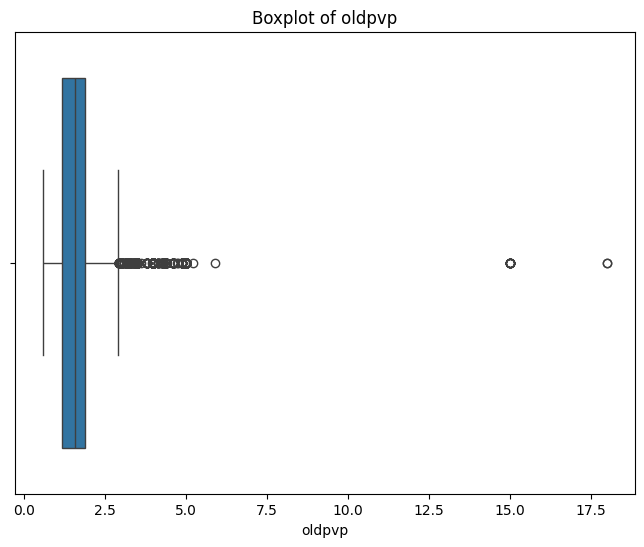

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=db['oldpvp'])
plt.title('Boxplot of oldpvp')
plt.show()

#### Oldpvp > 12.5

In [ ]:
filtered_db2 = db[db['oldpvp'] > 12.5]
filtered_db2

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
11030,14,33,marca14,17.99,1,266.0,Cash,1.44,0.050505,2021-10-27,...,2021-10-23,True,Large,21275.0,Beja,8.99,0.5,0.16,23.0,Saturday
11031,14,33,marca14,17.99,1,266.0,not_sell,1.44,0.050505,2021-10-27,...,NaT,False,Large,21275.0,Beja,8.99,0.5,0.16,NaN,NaN
94319,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94320,7,201,marca5,14.99,1,166.0,Cash,0.97,0.030641,2021-10-28,...,2021-10-19,True,Large,13618.0,Guarda,7.49,0.5,0.13,19.0,Tuesday
94321,7,201,marca5,14.99,1,166.0,Cash,0.97,0.030641,2021-10-28,...,2021-10-19,True,Large,13618.0,Guarda,7.49,0.5,0.13,19.0,Tuesday
94322,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94323,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94324,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94325,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94326,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN


##### sku=33

In [ ]:
sku33_data = db[db['sku'] == 33]
oldpvp_value_counts_sku33 = sku33_data['oldpvp'].value_counts()
oldpvp_value_counts_sku33


,count
oldpvp,
17.99,2


##### sku=201

In [ ]:
sku201_data = db[db['sku'] == 201]
oldpvp_value_counts_sku201 = sku201_data['oldpvp'].value_counts()
oldpvp_value_counts_sku201

,count
oldpvp,
14.99,11


#### Análise mais profunda

In [ ]:
oldpvp_counts = db.groupby(['sku','brand'])['oldpvp'].value_counts()
skus_with_multiple_oldpvps = oldpvp_counts[oldpvp_counts > 1]
skus_with_multiple_oldpvps

,,,count
sku,brand,oldpvp,
1,marca1,4.62,3
2,marca2,3.19,101
3,marca2,2.65,5
4,marca3,2.79,456
5,marca4,2.79,37
...,...,...,...
315,marca2,2.99,4
316,marca2,0.69,7
317,marca22,0.99,16


In [ ]:
filtered_df4 = db[(db['sku'] == 1) & (db['brand'] == 'marca1')]
filtered_df4

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
0,1,1,marca1,4.22,1,260.0,Card,0.34,0.010050,2021-10-03,...,2021-10-02,True,Large,4762.0,Évora,2.11,0.5,0.16,2.0,Saturday
1,1,1,marca1,3.96,1,260.0,not_sell,0.32,0.005025,2021-10-02,...,NaT,False,Large,4762.0,Évora,1.98,0.5,0.16,NaN,NaN
2,1,1,marca1,4.74,1,260.0,Cash,0.38,0.010050,2021-10-03,...,2021-10-03,True,Large,4762.0,Évora,2.37,0.5,0.16,3.0,Sunday
3,1,1,marca1,4.20,1,260.0,Card,0.34,0.010050,2021-10-03,...,2021-10-02,True,Large,4762.0,Évora,2.10,0.5,0.16,2.0,Saturday
4,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,...,2021-10-03,True,Large,4762.0,Évora,2.31,0.5,0.16,3.0,Sunday
5,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,...,2021-10-03,True,Large,4762.0,Évora,2.31,0.5,0.16,3.0,Sunday
6,1,1,marca1,3.42,1,260.0,Cash,0.27,0.005025,2021-10-02,...,2021-10-02,True,Large,4762.0,Évora,1.71,0.5,0.16,2.0,Saturday
7,1,1,marca1,3.62,1,260.0,Card,0.29,0.005025,2021-10-02,...,2021-10-02,True,Large,4762.0,Évora,1.81,0.5,0.16,2.0,Saturday
8,1,1,marca1,4.62,1,260.0,not_sell,0.37,0.005025,2021-10-02,...,NaT,False,Large,4762.0,Évora,2.31,0.5,0.16,NaN,NaN
9,1,1,marca1,4.38,1,260.0,Card,0.35,0.010050,2021-10-03,...,2021-10-02,True,Large,4762.0,Évora,2.19,0.5,0.16,2.0,Saturday


In [ ]:
precos_por_sku_brand = db.groupby(['sku', 'brand'])['oldpvp'].unique().reset_index()
precos_por_sku_brand.columns = ['SKU', 'Brand', 'Valores de Preço']
print(precos_por_sku_brand)

     SKU    Brand                                   Valores de Preço
0      1   marca1  [4.22, 3.96, 4.74, 4.2, 4.62, 3.42, 3.62, 4.38...
1      2   marca2                                        [3.19, nan]
2      3   marca2                                             [2.65]
3      4   marca3                                             [2.79]
4      5   marca4                                       [2.79, 2.99]
..   ...      ...                                                ...
313  315   marca2                                       [2.99, 3.09]
314  316   marca2                                       [0.69, 0.89]
315  317  marca22                                             [0.99]
316  318   marca2                                             [2.49]
317  319  marca24                                             [3.49]

[318 rows x 3 columns]


In [ ]:
precos_por_sku_brand['Amplitude de Preço'] = precos_por_sku_brand['Valores de Preço'].apply(lambda x: np.max(x) - np.min(x) if len(x) > 1 else 0)
precos_por_sku_brand = precos_por_sku_brand.sort_values('Amplitude de Preço', ascending=False)
precos_por_sku_brand

,SKU,Brand,Valores de Preço,Amplitude de Preço
120,122,marca2,"[0.96, 0.98, 0.97, 0.99, 0.95, 1.0, 4.29]",3.34
0,1,marca1,"[4.22, 3.96, 4.74, 4.2, 4.62, 3.42, 3.62, 4.38...",2.47
174,176,marca10,"[1.12, 1.47, 1.22, 1.71, 1.36, 1.68, 1.05, 1.7...",1.26
91,92,marca2,"[2.89, 1.69]",1.20
68,69,marca7,"[1.99, 2.8]",0.81
...,...,...,...,...
133,135,marca2,"[2.99, nan]",NaN
289,291,marca2,"[1.29, 0.99, 1.44, nan]",NaN
291,293,marca2,"[1.69, nan]",NaN
292,294,marca15,"[1.99, nan]",NaN


### newpvp

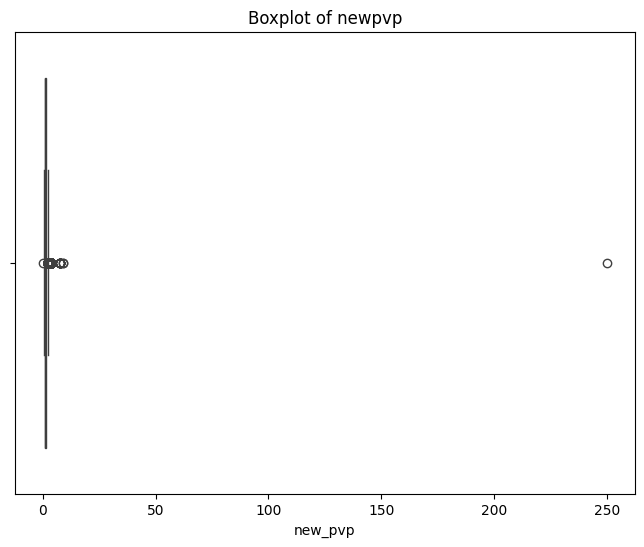

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=db['new_pvp'])
plt.title('Boxplot of newpvp')
plt.show()

In [ ]:
# Calcular a moda de 'oldpvp' e 'new_pvp' para produtos com sku = 4
mode_new_pvp_sku4 = db[db['sku'] == 4]['new_pvp'].mode()[0]

# Substituir os valores
db.loc[cond, 'new_pvp'] = mode_new_pvp_sku4

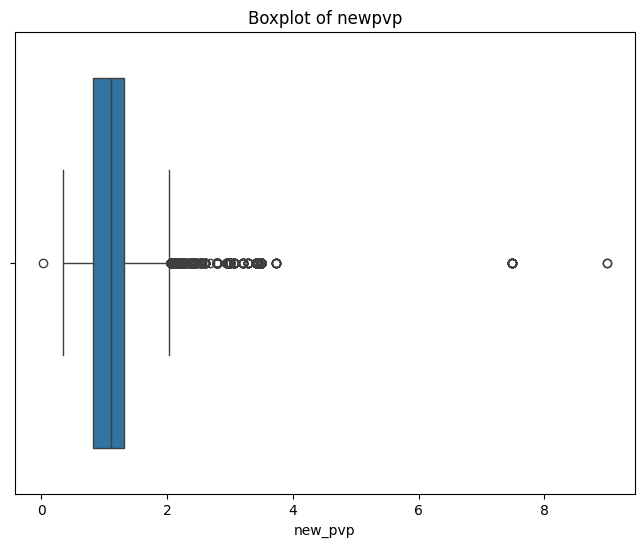

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=db['new_pvp'])
plt.title('Boxplot of newpvp')
plt.show()

In [ ]:
filtered_db_new_pvp_6 = db[db['new_pvp'] > 6]
filtered_db_new_pvp_6

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
11030,14,33,marca14,17.99,1,266.0,Cash,1.44,0.050505,2021-10-27,...,2021-10-23,True,Large,21275.0,Beja,8.99,0.5,0.16,23.0,Saturday
11031,14,33,marca14,17.99,1,266.0,not_sell,1.44,0.050505,2021-10-27,...,NaT,False,Large,21275.0,Beja,8.99,0.5,0.16,NaN,NaN
94319,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94320,7,201,marca5,14.99,1,166.0,Cash,0.97,0.030641,2021-10-28,...,2021-10-19,True,Large,13618.0,Guarda,7.49,0.5,0.13,19.0,Tuesday
94321,7,201,marca5,14.99,1,166.0,Cash,0.97,0.030641,2021-10-28,...,2021-10-19,True,Large,13618.0,Guarda,7.49,0.5,0.13,19.0,Tuesday
94322,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94323,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94324,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94325,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94326,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN


### profit

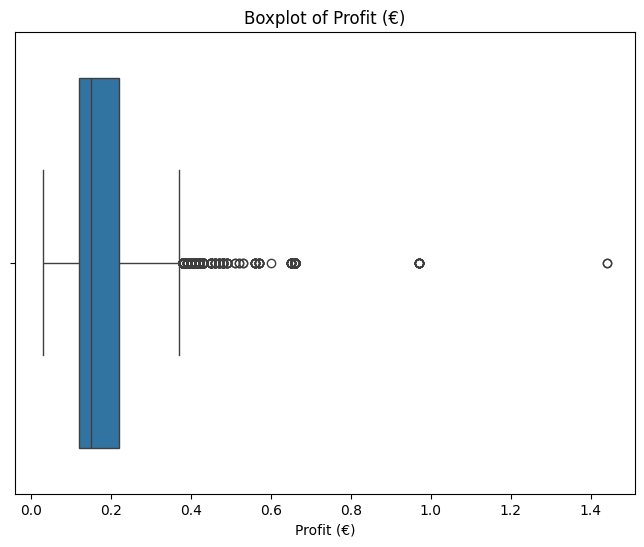

In [ ]:
#boxplot de profit

plt.figure(figsize=(8, 6))
sns.boxplot(x=db['Profit (€)'])
plt.title('Boxplot of Profit (€)')
plt.show()


In [ ]:
profit_greater_than_08 = db[db['Profit (€)'] > 0.8]
profit_greater_than_08

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
11030,14,33,marca14,17.99,1,266.0,Cash,1.44,0.050505,2021-10-27,...,2021-10-23,True,Large,21275.0,Beja,8.99,0.5,0.16,23.0,Saturday
11031,14,33,marca14,17.99,1,266.0,not_sell,1.44,0.050505,2021-10-27,...,NaT,False,Large,21275.0,Beja,8.99,0.5,0.16,NaN,NaN
94319,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94320,7,201,marca5,14.99,1,166.0,Cash,0.97,0.030641,2021-10-28,...,2021-10-19,True,Large,13618.0,Guarda,7.49,0.5,0.13,19.0,Tuesday
94321,7,201,marca5,14.99,1,166.0,Cash,0.97,0.030641,2021-10-28,...,2021-10-19,True,Large,13618.0,Guarda,7.49,0.5,0.13,19.0,Tuesday
94322,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94323,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94324,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94325,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN
94326,7,201,marca5,14.99,1,166.0,not_sell,0.97,0.030641,2021-10-28,...,NaT,False,Large,13618.0,Guarda,7.49,0.5,0.13,NaN,NaN


In [ ]:
profit_por_sku_brand = db.groupby(['sku', 'brand'])['Profit (€)'].unique().reset_index()
profit_por_sku_brand.columns = ['SKU', 'Brand', 'Profit (€)']
print(profit_por_sku_brand)

     SKU    Brand                                         Profit (€)
0      1   marca1  [0.34, 0.32, 0.38, 0.37, 0.27, 0.29, 0.35, 0.4...
1      2   marca2                                 [0.24, 0.36, 0.38]
2      3   marca2                                             [0.24]
3      4   marca3                                       [0.33, 0.36]
4      5   marca4                                 [0.33, 0.36, 0.38]
..   ...      ...                                                ...
313  315   marca2                                             [0.18]
314  316   marca2                                       [0.04, 0.08]
315  317  marca22                                        [0.14, 0.1]
316  318   marca2                                       [0.14, 0.19]
317  319  marca24                                             [0.46]

[318 rows x 3 columns]


In [ ]:
profit_por_sku_brand['Amplitude de Preço'] = profit_por_sku_brand['Profit (€)'].apply(lambda x: np.max(x) - np.min(x) if len(x) > 1 else 0)
profit_por_sku_brand = profit_por_sku_brand.sort_values('Amplitude de Preço', ascending=False)
profit_por_sku_brand

,SKU,Brand,Profit (€),Amplitude de Preço
120,122,marca2,"[0.13, 0.57]",0.44
91,92,marca2,"[0.38, 0.41, 0.47, 0.49, 0.22]",0.27
77,78,marca2,"[0.3, 0.42, 0.56]",0.26
112,114,marca2,"[0.4, 0.56, 0.6]",0.20
0,1,marca1,"[0.34, 0.32, 0.38, 0.37, 0.27, 0.29, 0.35, 0.4...",0.20
...,...,...,...,...
311,313,marca2,[0.12],0.00
313,315,marca2,[0.18],0.00
312,314,marca2,[0.12],0.00
2,3,marca2,[0.24],0.00


### discount

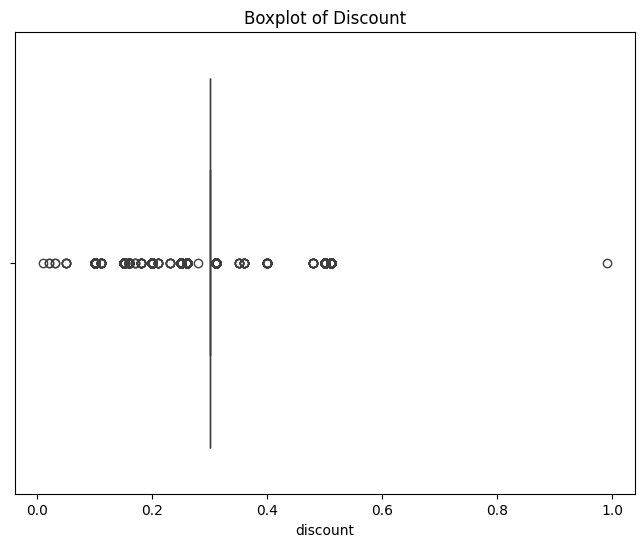

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=db['discount'])
plt.title('Boxplot of Discount')
plt.show()

In [ ]:
display(db[db['discount'] > 0.8])

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
550,83,4,marca3,2.79,1,134.0,not_sell,0.33,0.5,2021-10-09,...,NaT,False,Medium,4330.0,Braga,0.03,0.99,0.17,NaN,NaN


In [ ]:
products_sku4_marca3 = db[(db['sku'] == 4) & (db['brand'] == 'marca3')]
products_sku4_marca3

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
121,13,4,marca3,2.79,1,134.0,Card,0.33,0.25,2021-10-16,...,2021-10-16,True,Large,11925.0,Faro,1.95,0.3,0.17,16.0,Saturday
122,13,4,marca3,2.79,1,134.0,Cash,0.33,0.25,2021-10-16,...,2021-10-16,True,Large,11925.0,Faro,1.95,0.3,0.17,16.0,Saturday
123,13,4,marca3,2.79,1,134.0,Cash,0.33,0.25,2021-10-16,...,2021-10-16,True,Large,11925.0,Faro,1.95,0.3,0.17,16.0,Saturday
124,13,4,marca3,2.79,1,134.0,Cash,0.33,0.25,2021-10-16,...,2021-10-16,True,Large,11925.0,Faro,1.95,0.3,0.17,16.0,Saturday
125,13,4,marca3,2.79,1,134.0,Card,0.33,0.25,2021-10-16,...,2021-10-16,True,Large,11925.0,Faro,1.95,0.3,0.17,16.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,87,4,marca3,2.79,1,134.0,Cash,0.33,0.25,2021-10-07,...,2021-10-07,True,Medium,8009.0,Setúbal,1.95,0.3,0.17,7.0,Thursday
573,87,4,marca3,2.79,1,134.0,not_sell,0.33,0.25,2021-10-07,...,NaT,False,Medium,8009.0,Setúbal,1.95,0.3,0.17,NaN,NaN
574,87,4,marca3,2.79,1,134.0,not_sell,0.33,0.25,2021-10-07,...,NaT,False,Medium,8009.0,Setúbal,1.95,0.3,0.17,NaN,NaN
575,88,4,marca3,2.79,1,134.0,Cash,0.33,0.50,2021-10-05,...,2021-10-04,True,Medium,4854.0,Lisboa,1.95,0.3,0.17,4.0,Monday


In [ ]:
products_sku4_marca3['Profit (€)'].value_counts()

,count
Profit (€),
0.33,429
0.36,27


In [ ]:
products_sku4_marca3['oldpvp'].value_counts()

,count
oldpvp,
2.79,456


In [ ]:
products_sku4_marca3['discount'].value_counts()

,count
discount,
0.30,427
0.25,27
0.50,1
0.99,1


In [ ]:
profitestranho = products_sku4_marca3[
    (products_sku4_marca3['discount'] == 0.50) |
    (products_sku4_marca3['discount'] == 0.99)
]
profitestranho

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
452,64,4,marca3,2.79,1,134.0,Card,0.33,0.25,2021-10-30,...,2021-10-29,True,Medium,7879.0,Santarém,1.95,0.50,0.17,29.0,Friday
550,83,4,marca3,2.79,1,134.0,not_sell,0.33,0.50,2021-10-09,...,NaT,False,Medium,4330.0,Braga,0.03,0.99,0.17,NaN,NaN


In [ ]:
db.loc[profitestranho.index, 'discount'] = 0.30
db.loc[profitestranho.index]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
452,64,4,marca3,2.79,1,134.0,Card,0.33,0.25,2021-10-30,...,2021-10-29,True,Medium,7879.0,Santarém,1.95,0.3,0.17,29.0,Friday
550,83,4,marca3,2.79,1,134.0,not_sell,0.33,0.50,2021-10-09,...,NaT,False,Medium,4330.0,Braga,0.03,0.3,0.17,NaN,NaN


In [ ]:
# Calcular o novo 'new_pvp' após alterar o oldpvp
db.loc[profitestranho.index, 'new_pvp'] = (db.loc[profitestranho.index, 'oldpvp'] -
                                        (db.loc[profitestranho.index, 'oldpvp'] * db.loc[profitestranho.index, 'discount'])).round(2)
db.loc[profitestranho.index]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
452,64,4,marca3,2.79,1,134.0,Card,0.33,0.25,2021-10-30,...,2021-10-29,True,Medium,7879.0,Santarém,1.95,0.3,0.17,29.0,Friday
550,83,4,marca3,2.79,1,134.0,not_sell,0.33,0.50,2021-10-09,...,NaT,False,Medium,4330.0,Braga,1.95,0.3,0.17,NaN,NaN


Considerando o sku4 e marca3 verificámos que havia apenas duas possibilidades de profit. Desta forma, só seria possível duas opções de discount visto que o preço do sku4 e marca 3 é único. Concluímos então que o discount 0.5 e 0.99 não estavam correctos. O profit 0.33 tinha 429 obsesrvações e o 0.36 tinha 27 observações. Como o discount 0.25 tinha 29 observações e o discount 0.30 tinha apenas 427, considerámos que as duas observações com discount 0.5 e 0.99 deviam ser substituidos por 0.3 para prefazer os 429 .

### weight

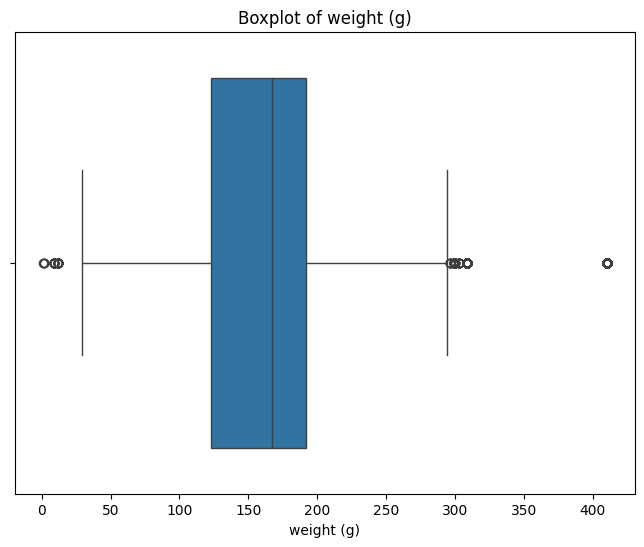

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=db['weight (g)'])
plt.title('Boxplot of weight (g)')
plt.show()


In [ ]:
filtered_db_weight = db[db['weight (g)'] > 350]
filtered_db_weight

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
114940,14,247,marca7,1.99,1,410.0,Card,0.28,1.0,2021-10-08,...,2021-10-07,True,Large,21275.0,Beja,1.39,0.3,0.2,7.0,Thursday
114941,14,247,marca7,1.99,1,410.0,Cash,0.28,0.5,2021-10-22,...,2021-10-21,True,Large,21275.0,Beja,1.39,0.3,0.2,21.0,Thursday
114942,14,247,marca7,1.99,1,410.0,Cash,0.28,0.5,2021-10-22,...,2021-10-22,True,Large,21275.0,Beja,1.39,0.3,0.2,22.0,Friday
114943,14,247,marca7,1.99,1,410.0,Cash,0.28,1.0,2021-10-18,...,2021-10-17,True,Large,21275.0,Beja,1.39,0.3,0.2,17.0,Sunday
114944,14,247,marca7,1.99,1,410.0,Card,0.28,1.0,2021-10-18,...,2021-10-18,True,Large,21275.0,Beja,1.39,0.3,0.2,18.0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116426,285,247,marca7,1.99,1,410.0,not_sell,0.28,1.0,2021-10-18,...,NaT,False,Small,NaN,Aveiro,1.39,0.3,0.2,NaN,NaN
116427,285,247,marca7,1.99,1,410.0,not_sell,0.28,1.0,2021-10-18,...,NaT,False,Small,NaN,Aveiro,1.39,0.3,0.2,NaN,NaN
116428,285,247,marca7,1.99,1,410.0,not_sell,0.28,1.0,2021-10-18,...,NaT,False,Small,NaN,Aveiro,1.39,0.3,0.2,NaN,NaN
116429,285,247,marca7,1.99,1,410.0,not_sell,0.28,1.0,2021-10-18,...,NaT,False,Small,NaN,Aveiro,1.39,0.3,0.2,NaN,NaN


In [ ]:
filtered_db_weight['sku'].value_counts()

,count
sku,
247,1491


In [ ]:
db[db['sku'] == 247]['weight (g)'].value_counts()

,count
weight (g),
410.0,1491


Tendo em consideração que todos os produtos com sku=247 têm o mesmo peso, não aparenta ser um erro, pelo que não será tratado

In [ ]:
filtered_db_weight2 = db[db['weight (g)'] < 20]
filtered_db_weight2

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
57860,127,125,marca5,4.29,1,9.0,Cash,0.24,0.040404,2021-10-27,...,2021-10-23,True,Medium,6748.0,Faro,2.14,0.5,0.11,23.0,Saturday
57861,127,125,marca5,4.29,1,9.0,Cash,0.24,0.040404,2021-10-27,...,2021-10-27,True,Medium,6748.0,Faro,2.14,0.5,0.11,27.0,Wednesday
57862,127,125,marca5,4.29,1,9.0,Card,0.24,0.040404,2021-10-27,...,2021-10-27,True,Medium,6748.0,Faro,2.14,0.5,0.11,27.0,Wednesday
57863,127,125,marca5,4.29,1,9.0,not_sell,0.24,0.040404,2021-10-27,...,NaT,False,Medium,6748.0,Faro,2.14,0.5,0.11,NaN,NaN
57864,101,125,marca5,4.29,1,9.0,Cash,0.24,0.080808,2021-10-26,...,2021-10-19,True,Medium,5223.0,Santarém,2.14,0.5,0.11,19.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149524,152,308,marca16,1.99,1,12.0,Card,0.16,0.020661,2021-10-26,...,2021-10-25,True,Small,686.0,Évora,0.99,0.5,0.16,25.0,Monday
149525,152,308,marca16,1.99,1,12.0,Cash,0.16,0.020661,2021-10-26,...,2021-10-25,True,Small,686.0,Évora,0.99,0.5,0.16,25.0,Monday
149526,185,308,marca16,1.99,1,12.0,not_sell,0.16,0.000000,2021-10-27,...,NaT,False,Small,136.0,Setúbal,0.99,0.5,0.16,NaN,NaN
149527,185,308,marca16,1.99,1,12.0,not_sell,0.16,0.000000,2021-10-27,...,NaT,False,Small,136.0,Setúbal,0.99,0.5,0.16,NaN,NaN


In [ ]:
filtered_db_weight2['sku'].value_counts()

,count
sku,
308,34
125,24
260,3
178,1


In [ ]:
filtrado308 = db[db['sku'] == 308]
filtrado308['weight (g)'].value_counts()

,count
weight (g),
12.0,34


In [ ]:
filtrado125 = db[db['sku'] == 125]
filtrado125['weight (g)'].value_counts()

,count
weight (g),
9.0,24


In [ ]:
filtrado260 = db[db['sku'] == 260]
filtrado260['weight (g)'].value_counts()

,count
weight (g),
2.0,3


## 3.2 Missing Values

In [ ]:
db.isna().sum()

,0
idstore,0
sku,0
brand,0
oldpvp,22
labelqty,0
weight (g),428
Payment_method,0
Profit (€),0
perc_expiring_sku,125
expiring_date,0


### sold

In [ ]:
soldnulo = db[db['sold'].isnull()]
soldnulo.head()


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week


In [ ]:
db['sold'].value_counts()

,count
sold,
True,80567
False,69486


In [ ]:
db[(db['sell_date'].notna()) & (db['sold'] == False)]


,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week


In [ ]:
db[(db['sell_date'].isna()) & (db['sold'] == True)]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
124492,67,254,marca8,1.29,1,309.0,not_sell,0.15,0.500000,2021-10-30,...,NaT,True,Medium,10084.0,Castelo Branco,0.96,0.26,0.16,NaN,NaN
124494,67,254,marca8,1.29,1,309.0,not_sell,0.15,0.500000,2021-10-30,...,NaT,True,Medium,10084.0,Castelo Branco,0.96,0.26,0.16,NaN,NaN
124725,25,257,marca2,0.79,1,260.0,not_sell,0.07,0.285714,2021-10-08,...,NaT,True,Large,14855.0,Porto,0.55,0.30,0.13,NaN,NaN
124732,27,257,marca2,0.79,1,260.0,not_sell,0.07,0.142857,2021-10-29,...,NaT,True,Large,21060.0,Castelo Branco,0.55,0.30,0.13,NaN,NaN
124737,27,257,marca2,0.79,1,260.0,not_sell,0.07,0.142857,2021-10-30,...,NaT,True,Large,21060.0,Castelo Branco,0.55,0.30,0.13,NaN,NaN
124928,48,257,marca2,0.79,1,260.0,not_sell,0.07,0.285714,2021-10-16,...,NaT,True,Medium,7997.0,Bragança,0.55,0.30,0.13,NaN,NaN
124931,48,257,marca2,0.79,1,260.0,not_sell,0.07,0.142857,2021-10-07,...,NaT,True,Medium,7997.0,Bragança,0.55,0.30,0.13,NaN,NaN
124934,48,257,marca2,0.79,1,260.0,not_sell,0.07,0.142857,2021-10-28,...,NaT,True,Medium,7997.0,Bragança,0.55,0.30,0.13,NaN,NaN
125351,18,259,marca15,1.69,1,166.0,not_sell,0.14,0.666667,2021-10-03,...,NaT,True,Large,12373.0,Leiria,1.18,0.30,0.12,NaN,NaN
125356,18,259,marca15,1.69,1,166.0,not_sell,0.14,0.333333,2021-10-24,...,NaT,True,Large,12373.0,Leiria,1.18,0.30,0.12,NaN,NaN


Existem produtos que não têm data de venda, mas que estão considerados como vendidos. Assim iremos alterar o valor do sold para False.

In [ ]:
db.loc[db['sell_date'].isna() & (db['sold'] == True), 'sold'] = False


In [ ]:
db['sold'].value_counts()

,count
sold,
True,80511
False,69542


### sell_date, selling_day e selling_day_of_week

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150053 entries, 0 to 150053
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   idstore              150053 non-null  object        
 1   sku                  150053 non-null  object        
 2   brand                150053 non-null  object        
 3   oldpvp               150031 non-null  float64       
 4   labelqty             150053 non-null  int64         
 5   weight (g)           149625 non-null  float64       
 6   Payment_method       150053 non-null  object        
 7   Profit (€)           150053 non-null  float64       
 8   perc_expiring_sku    149928 non-null  float64       
 9   expiring_date        150053 non-null  datetime64[ns]
 10  labelling_date       150053 non-null  datetime64[ns]
 11  sell_date            80511 non-null   datetime64[ns]
 12  sold                 150053 non-null  bool          
 13  type               

In [ ]:
db.isna().sum()

,0
idstore,0
sku,0
brand,0
oldpvp,22
labelqty,0
weight (g),428
Payment_method,0
Profit (€),0
perc_expiring_sku,125
expiring_date,0


Os valores nulos nas variaveis sell_date, selling_day e selling_day_of_week fazem sentido, pois os produtos ainda não foram vendidos e não temos essas datas.

### perc_expiring_sku

In [ ]:
percnulo = db[db['perc_expiring_sku'].isnull()]
percnulo

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
13868,89,45,marca18,2.19,1,300.0,Card,0.31,NaN,2021-10-27,...,2021-10-26,True,Medium,5829.0,Lisboa,1.53,0.30,0.20,26.0,Tuesday
13869,89,45,marca18,2.19,1,300.0,Cash,0.31,NaN,2021-10-27,...,2021-10-26,True,Medium,5829.0,Lisboa,1.53,0.30,0.20,26.0,Tuesday
13870,89,45,marca18,2.19,1,300.0,not_sell,0.31,NaN,2021-10-27,...,NaT,False,Medium,5829.0,Lisboa,1.53,0.30,0.20,NaN,NaN
13871,89,45,marca18,2.19,1,300.0,Cash,0.31,NaN,2021-10-23,...,2021-10-23,True,Medium,5829.0,Lisboa,1.53,0.30,0.20,23.0,Saturday
13872,89,45,marca18,2.19,1,300.0,not_sell,0.31,NaN,2021-10-23,...,NaT,False,Medium,5829.0,Lisboa,1.53,0.30,0.20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78752,92,176,marca10,1.26,1,193.0,Card,0.12,NaN,2021-10-25,...,2021-10-25,True,Medium,7230.0,Beja,0.94,0.25,0.13,25.0,Monday
78753,92,176,marca10,1.47,1,193.0,Cash,0.14,NaN,2021-10-29,...,2021-10-29,True,Medium,7230.0,Beja,1.10,0.25,0.13,29.0,Friday
78754,92,176,marca10,1.12,1,193.0,Cash,0.11,NaN,2021-10-29,...,2021-10-29,True,Medium,7230.0,Beja,0.84,0.25,0.13,29.0,Friday
78755,92,176,marca10,0.84,1,193.0,Card,0.08,NaN,2021-10-29,...,2021-10-29,True,Medium,7230.0,Beja,0.63,0.25,0.13,29.0,Friday


<Axes: xlabel='sold', ylabel='perc_expiring_sku'>

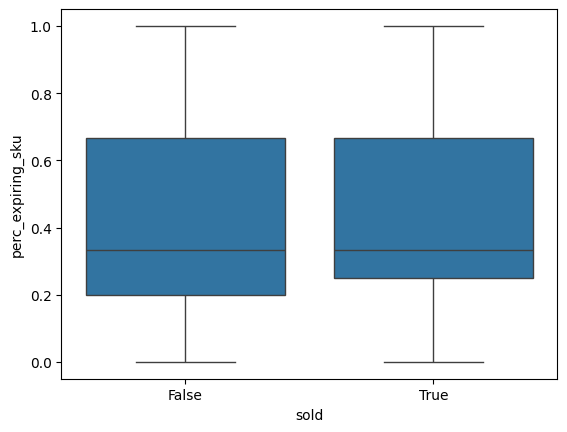

In [ ]:
sns.boxplot(y = 'perc_expiring_sku', x = 'sold', data = db)

In [ ]:
percnulo[['sku', 'brand']].value_counts()

,,count
sku,brand,
176,marca10,73
149,marca12,47
45,marca18,5


In [ ]:
sku176marca10 = db[(db['sku'] == 176) & (db['brand'] == 'marca10')]
sku176marca10

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
78684,91,176,marca10,1.12,1,193.0,not_sell,0.11,NaN,2021-10-31,...,NaT,False,Medium,8952.0,Aveiro,0.84,0.25,0.13,NaN,NaN
78685,91,176,marca10,1.47,1,193.0,not_sell,0.13,NaN,2021-10-27,...,NaT,False,Medium,8952.0,Aveiro,1.02,0.31,0.13,NaN,NaN
78686,91,176,marca10,1.47,1,193.0,not_sell,0.13,NaN,2021-10-27,...,NaT,False,Medium,8952.0,Aveiro,1.02,0.31,0.13,NaN,NaN
78687,91,176,marca10,1.22,1,193.0,Card,0.11,NaN,2021-10-27,...,2021-10-27,True,Medium,8952.0,Aveiro,0.85,0.30,0.13,27.0,Wednesday
78688,91,176,marca10,1.22,1,193.0,not_sell,0.11,NaN,2021-10-27,...,NaT,False,Medium,8952.0,Aveiro,0.85,0.30,0.13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78752,92,176,marca10,1.26,1,193.0,Card,0.12,NaN,2021-10-25,...,2021-10-25,True,Medium,7230.0,Beja,0.94,0.25,0.13,25.0,Monday
78753,92,176,marca10,1.47,1,193.0,Cash,0.14,NaN,2021-10-29,...,2021-10-29,True,Medium,7230.0,Beja,1.10,0.25,0.13,29.0,Friday
78754,92,176,marca10,1.12,1,193.0,Cash,0.11,NaN,2021-10-29,...,2021-10-29,True,Medium,7230.0,Beja,0.84,0.25,0.13,29.0,Friday
78755,92,176,marca10,0.84,1,193.0,Card,0.08,NaN,2021-10-29,...,2021-10-29,True,Medium,7230.0,Beja,0.63,0.25,0.13,29.0,Friday


In [ ]:
marca10 = db[ (db['brand'] == 'marca10')]
marca10.describe()

,oldpvp,labelqty,weight (g),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,selling_square_ft,new_pvp,discount,Margem_num,selling_day
count,101.000000,101.0,101.000000,101.000000,28.000000,101,101,67,101.000000,101.000000,101.000000,101.000000,67.000000
mean,1.616337,1.0,208.801980,0.147921,0.267857,2021-10-20 07:50:29.702970368,2021-10-19 23:17:13.663366400,2021-10-17 12:10:44.776119296,7560.059406,1.177723,0.270000,0.127228,17.507463
min,0.840000,1.0,193.000000,0.080000,0.000000,2021-10-03 00:00:00,2021-10-02 00:00:00,2021-10-02 00:00:00,5829.000000,0.630000,0.150000,0.120000,2.000000
25%,1.290000,1.0,193.000000,0.120000,0.000000,2021-10-15 00:00:00,2021-10-14 00:00:00,2021-10-05 00:00:00,7230.000000,0.940000,0.250000,0.120000,5.000000
50%,1.500000,1.0,193.000000,0.140000,0.500000,2021-10-24 00:00:00,2021-10-23 00:00:00,2021-10-19 00:00:00,7230.000000,1.090000,0.260000,0.130000,19.000000
75%,2.190000,1.0,250.000000,0.180000,0.500000,2021-10-27 00:00:00,2021-10-27 00:00:00,2021-10-27 12:00:00,8952.000000,1.530000,0.300000,0.130000,27.500000
max,2.190000,1.0,250.000000,0.220000,0.500000,2021-10-31 00:00:00,2021-10-31 00:00:00,2021-10-31 00:00:00,8952.000000,1.860000,0.310000,0.130000,31.000000
std,0.417020,0.0,25.642161,0.033891,0.253937,NaN,NaN,NaN,1191.331716,0.314073,0.036986,0.004499,10.518920


In [ ]:
sku45marca18 = db[(db['sku'] == 45) & (db['brand'] == 'marca18')]
sku45marca18

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
13868,89,45,marca18,2.19,1,300.0,Card,0.31,NaN,2021-10-27,...,2021-10-26,True,Medium,5829.0,Lisboa,1.53,0.3,0.2,26.0,Tuesday
13869,89,45,marca18,2.19,1,300.0,Cash,0.31,NaN,2021-10-27,...,2021-10-26,True,Medium,5829.0,Lisboa,1.53,0.3,0.2,26.0,Tuesday
13870,89,45,marca18,2.19,1,300.0,not_sell,0.31,NaN,2021-10-27,...,NaT,False,Medium,5829.0,Lisboa,1.53,0.3,0.2,NaN,NaN
13871,89,45,marca18,2.19,1,300.0,Cash,0.31,NaN,2021-10-23,...,2021-10-23,True,Medium,5829.0,Lisboa,1.53,0.3,0.2,23.0,Saturday
13872,89,45,marca18,2.19,1,300.0,not_sell,0.31,NaN,2021-10-23,...,NaT,False,Medium,5829.0,Lisboa,1.53,0.3,0.2,NaN,NaN


In [ ]:
marca18 = db[ (db['brand'] == 'marca18')]
marca18.describe()

,oldpvp,labelqty,weight (g),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,selling_square_ft,new_pvp,discount,Margem_num,selling_day
count,86.000000,86.0,86.000000,86.000000,81.000000,86,86,46,86.000000,86.000000,86.000000,86.000000,46.000000
mean,2.671047,1.0,169.244186,0.297326,0.265138,2021-10-08 22:36:16.744186112,2021-10-08 03:37:40.465116160,2021-10-09 21:23:28.695652096,6371.302326,1.867907,0.299767,0.156279,9.891304
min,1.590000,1.0,45.000000,0.120000,0.000000,2021-10-03 00:00:00,2021-10-02 00:00:00,2021-10-02 00:00:00,5829.000000,1.110000,0.250000,0.110000,2.000000
25%,2.190000,1.0,118.000000,0.230000,0.333333,2021-10-03 00:00:00,2021-10-02 00:00:00,2021-10-02 00:00:00,5829.000000,1.530000,0.300000,0.132500,2.000000
50%,2.990000,1.0,148.000000,0.310000,0.333333,2021-10-05 00:00:00,2021-10-04 00:00:00,2021-10-03 00:00:00,5829.000000,2.090000,0.300000,0.160000,3.000000
75%,2.990000,1.0,216.000000,0.390000,0.333333,2021-10-15 00:00:00,2021-10-14 00:00:00,2021-10-16 18:00:00,7230.000000,2.090000,0.300000,0.160000,16.750000
max,3.490000,1.0,303.000000,0.420000,0.333333,2021-10-27 00:00:00,2021-10-26 00:00:00,2021-10-26 00:00:00,8045.000000,2.510000,0.310000,0.200000,26.000000
std,0.621486,0.0,77.410128,0.098105,0.134041,NaN,NaN,NaN,712.313729,0.437439,0.005735,0.029627,9.461567


In [ ]:
sku149marca12 = db[(db['sku'] == 149) & (db['brand'] == 'marca12')]
sku149marca12

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
69819,182,149,marca12,2.65,1,202.0,not_sell,0.22,NaN,2021-10-02,...,NaT,False,Small,703.0,Viseu,1.85,0.3,0.12,NaN,NaN
69820,182,149,marca12,2.65,1,202.0,Cash,0.22,NaN,2021-10-02,...,2021-10-01,True,Small,703.0,Viseu,1.85,0.3,0.12,1.0,Friday
69821,182,149,marca12,2.65,1,202.0,Card,0.22,NaN,2021-10-02,...,2021-10-01,True,Small,703.0,Viseu,1.85,0.3,0.12,1.0,Friday
69822,182,149,marca12,2.65,1,202.0,Cash,0.22,NaN,2021-10-02,...,2021-10-01,True,Small,703.0,Viseu,1.85,0.3,0.12,1.0,Friday
69823,182,149,marca12,2.65,1,202.0,Card,0.22,NaN,2021-10-02,...,2021-10-01,True,Small,703.0,Viseu,1.85,0.3,0.12,1.0,Friday
69824,182,149,marca12,2.65,1,202.0,Card,0.22,NaN,2021-10-02,...,2021-10-02,True,Small,703.0,Viseu,1.85,0.3,0.12,2.0,Saturday
69825,182,149,marca12,2.65,1,202.0,not_sell,0.22,NaN,2021-10-02,...,NaT,False,Small,703.0,Viseu,1.85,0.3,0.12,NaN,NaN
69826,182,149,marca12,2.65,1,202.0,not_sell,0.22,NaN,2021-10-02,...,NaT,False,Small,703.0,Viseu,1.85,0.3,0.12,NaN,NaN
69827,182,149,marca12,2.65,1,202.0,not_sell,0.22,NaN,2021-10-02,...,NaT,False,Small,703.0,Viseu,1.85,0.3,0.12,NaN,NaN
69828,182,149,marca12,2.65,1,202.0,not_sell,0.22,NaN,2021-10-02,...,NaT,False,Small,703.0,Viseu,1.85,0.3,0.12,NaN,NaN


In [ ]:
marca12 = db[ (db['brand'] == 'marca12')]
marca12.describe()

,oldpvp,labelqty,weight (g),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,selling_square_ft,new_pvp,discount,Margem_num,selling_day
count,1760.000000,1760.0,1760.000000,1760.000000,1713.000000,1760,1760,922,1694.000000,1760.000000,1760.000000,1760.000000,922.000000
mean,1.047170,1.0,143.814773,0.087625,0.610663,2021-10-16 00:16:21.818181888,2021-10-14 14:46:54.545454336,2021-10-15 16:08:19.783080192,2816.324675,0.554352,0.482477,0.161477,15.672451
min,0.990000,1.0,51.000000,0.060000,0.000000,2021-10-02 00:00:00,2021-10-01 00:00:00,2021-10-01 00:00:00,115.000000,0.490000,0.300000,0.120000,1.000000
25%,0.990000,1.0,85.000000,0.070000,0.250000,2021-10-07 00:00:00,2021-10-06 00:00:00,2021-10-07 06:00:00,686.000000,0.490000,0.510000,0.140000,7.250000
50%,0.990000,1.0,121.000000,0.080000,0.500000,2021-10-14 00:00:00,2021-10-13 00:00:00,2021-10-14 00:00:00,703.000000,0.490000,0.510000,0.170000,14.000000
75%,0.990000,1.0,232.000000,0.090000,1.000000,2021-10-21 00:00:00,2021-10-21 00:00:00,2021-10-21 00:00:00,4762.000000,0.490000,0.510000,0.190000,21.000000
max,2.650000,1.0,278.000000,0.230000,1.000000,2021-10-31 00:00:00,2021-10-31 00:00:00,2021-10-31 00:00:00,13480.000000,1.850000,0.510000,0.200000,31.000000
std,0.291378,0.0,72.148754,0.030682,0.375597,NaN,NaN,NaN,3710.636055,0.235370,0.070776,0.024929,8.409258


In [ ]:
same_date_count = len(percnulo[percnulo['labelling_date'] == percnulo['expiring_date']])
same_date_count

54

In [ ]:
null_perc_expiring_date = db[db['perc_expiring_sku'].isnull()]
matching_dates = null_perc_expiring_date[null_perc_expiring_date['expiring_date'] == null_perc_expiring_date['labelling_date']]
matching_dates

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
13871,89,45,marca18,2.19,1,300.0,Cash,0.31,NaN,2021-10-23,...,2021-10-23,True,Medium,5829.0,Lisboa,1.53,0.30,0.20,23.0,Saturday
13872,89,45,marca18,2.19,1,300.0,not_sell,0.31,NaN,2021-10-23,...,NaT,False,Medium,5829.0,Lisboa,1.53,0.30,0.20,NaN,NaN
78684,91,176,marca10,1.12,1,193.0,not_sell,0.11,NaN,2021-10-31,...,NaT,False,Medium,8952.0,Aveiro,0.84,0.25,0.13,NaN,NaN
78685,91,176,marca10,1.47,1,193.0,not_sell,0.13,NaN,2021-10-27,...,NaT,False,Medium,8952.0,Aveiro,1.02,0.31,0.13,NaN,NaN
78686,91,176,marca10,1.47,1,193.0,not_sell,0.13,NaN,2021-10-27,...,NaT,False,Medium,8952.0,Aveiro,1.02,0.31,0.13,NaN,NaN
78687,91,176,marca10,1.22,1,193.0,Card,0.11,NaN,2021-10-27,...,2021-10-27,True,Medium,8952.0,Aveiro,0.85,0.30,0.13,27.0,Wednesday
78688,91,176,marca10,1.22,1,193.0,not_sell,0.11,NaN,2021-10-27,...,NaT,False,Medium,8952.0,Aveiro,0.85,0.30,0.13,NaN,NaN
78689,91,176,marca10,1.71,1,193.0,not_sell,0.15,NaN,2021-10-27,...,NaT,False,Medium,8952.0,Aveiro,1.19,0.30,0.13,NaN,NaN
78690,91,176,marca10,1.36,1,193.0,not_sell,0.12,NaN,2021-10-27,...,NaT,False,Medium,8952.0,Aveiro,0.95,0.30,0.13,NaN,NaN
78691,91,176,marca10,1.68,1,193.0,not_sell,0.15,NaN,2021-10-27,...,NaT,False,Medium,8952.0,Aveiro,1.17,0.30,0.13,NaN,NaN


In [ ]:
db.loc[matching_dates.index, 'perc_expiring_sku'] = 0

In [ ]:
percnulo = db[db['perc_expiring_sku'].isnull()]
percnulo

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
13868,89,45,marca18,2.19,1,300.0,Card,0.31,NaN,2021-10-27,...,2021-10-26,True,Medium,5829.0,Lisboa,1.53,0.30,0.20,26.0,Tuesday
13869,89,45,marca18,2.19,1,300.0,Cash,0.31,NaN,2021-10-27,...,2021-10-26,True,Medium,5829.0,Lisboa,1.53,0.30,0.20,26.0,Tuesday
13870,89,45,marca18,2.19,1,300.0,not_sell,0.31,NaN,2021-10-27,...,NaT,False,Medium,5829.0,Lisboa,1.53,0.30,0.20,NaN,NaN
69819,182,149,marca12,2.65,1,202.0,not_sell,0.22,NaN,2021-10-02,...,NaT,False,Small,703.0,Viseu,1.85,0.30,0.12,NaN,NaN
69820,182,149,marca12,2.65,1,202.0,Cash,0.22,NaN,2021-10-02,...,2021-10-01,True,Small,703.0,Viseu,1.85,0.30,0.12,1.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78747,92,176,marca10,1.99,1,193.0,Card,0.18,NaN,2021-10-17,...,2021-10-16,True,Medium,7230.0,Beja,1.39,0.30,0.13,16.0,Saturday
78748,92,176,marca10,2.03,1,193.0,Card,0.18,NaN,2021-10-17,...,2021-10-16,True,Medium,7230.0,Beja,1.42,0.30,0.13,16.0,Saturday
78749,92,176,marca10,1.19,1,193.0,Cash,0.12,NaN,2021-10-24,...,2021-10-23,True,Medium,7230.0,Beja,0.89,0.25,0.13,23.0,Saturday
78750,92,176,marca10,1.43,1,193.0,Cash,0.14,NaN,2021-10-24,...,2021-10-23,True,Medium,7230.0,Beja,1.07,0.25,0.13,23.0,Saturday


In [ ]:
percnulo['sku'].value_counts()

,count
sku,
149,47
176,21
45,3


In [ ]:
percnulo['brand'].value_counts()

,count
brand,
marca12,47
marca10,21
marca18,3


In [ ]:
db['perc_expiring_sku'].describe()

,perc_expiring_sku
count,149982.000000
mean,0.384840
std,0.222740
min,0.000000
25%,0.200000
50%,0.333333
75%,0.666667
max,1.000000


In [ ]:
median_perc_expiring_sku = db['perc_expiring_sku'].median()
db['perc_expiring_sku']=db['perc_expiring_sku'].fillna(median_perc_expiring_sku)


In [ ]:
db.isna().sum()

,0
idstore,0
sku,0
brand,0
oldpvp,22
labelqty,0
weight (g),428
Payment_method,0
Profit (€),0
perc_expiring_sku,0
expiring_date,0


### weight

In [ ]:
sempeso = db[db['weight (g)'].isnull()]
sempeso

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
46,7,2,marca2,3.19,1,NaN,not_sell,0.36,0.111111,2021-10-26,...,NaT,False,Large,13618.0,Guarda,2.39,0.25,0.15,NaN,NaN
147,14,4,marca3,2.79,1,NaN,Card,0.33,0.250000,2021-10-28,...,2021-10-27,True,Large,21275.0,Beja,1.95,0.30,0.17,27.0,Wednesday
169,18,4,marca3,2.79,1,NaN,not_sell,0.33,0.250000,2021-10-21,...,NaT,False,Large,12373.0,Leiria,1.95,0.30,0.17,NaN,NaN
180,21,4,marca3,2.79,1,NaN,Card,0.33,0.250000,2021-10-09,...,2021-10-09,True,Large,17657.0,Guarda,1.95,0.30,0.17,9.0,Saturday
16381,199,47,marca2,2.95,1,NaN,Cash,0.25,0.060606,2021-10-25,...,2021-10-19,True,Medium,12009.0,Castelo Branco,1.47,0.50,0.17,19.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78923,217,181,marca25,1.29,1,NaN,Cash,0.18,0.250000,2021-10-12,...,2021-10-12,True,Small,115.0,Lisboa,0.90,0.30,0.20,12.0,Tuesday
78924,217,181,marca25,1.29,1,NaN,Cash,0.18,0.250000,2021-10-12,...,2021-10-12,True,Small,115.0,Lisboa,0.90,0.30,0.20,12.0,Tuesday
78925,217,181,marca25,1.29,1,NaN,Card,0.18,0.000000,2021-10-24,...,2021-10-24,True,Small,115.0,Lisboa,0.90,0.30,0.20,24.0,Sunday
78926,217,181,marca25,1.29,1,NaN,Cash,0.18,0.000000,2021-10-24,...,2021-10-24,True,Small,115.0,Lisboa,0.90,0.30,0.20,24.0,Sunday


In [ ]:
sempeso['sku'].value_counts()


,count
sku,
170,277
181,95
47,34
148,18
4,3
2,1


In [ ]:
weight_mode_by_sku = db.groupby('sku')['weight (g)'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
weight_mode_by_sku

,weight (g)
sku,
1,260.0
2,222.0
3,194.0
4,134.0
5,219.0
...,...
315,204.0
316,157.0
317,261.0


In [ ]:
for sku in [2, 4]:
  db.loc[(db['sku'] == sku) & (db['weight (g)'].isnull()), 'weight (g)'] = weight_mode_by_sku.get(sku)


In [ ]:
imputer = KNNImputer(n_neighbors=1)
cols_to_impute = ['weight (g)']
numeric_db = db[cols_to_impute]
db[cols_to_impute] = imputer.fit_transform(numeric_db)
print(db['weight (g)'].isna().sum())

0


### old_pvp

In [ ]:
db[db['oldpvp'].isnull()]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
15,2,2,marca2,NaN,1,222.0,Cash,0.24,0.121212,2021-10-25,...,2021-10-14,True,Large,12358.0,Bragança,1.59,0.5,0.15,14.0,Thursday
877,59,7,marca5,NaN,1,131.0,not_sell,0.15,0.666667,2021-10-17,...,NaT,False,Medium,6540.0,Guarda,1.53,0.3,0.10,NaN,NaN
959,14,8,marca2,NaN,1,174.0,Cash,0.12,0.200000,2021-10-29,...,2021-10-28,True,Large,21275.0,Beja,0.83,0.3,0.15,28.0,Thursday
7568,289,12,marca2,NaN,1,225.0,Card,0.18,0.666667,2021-10-16,...,2021-10-15,True,Small,342.0,Viana do Castelo,0.97,0.3,0.19,15.0,Friday
7575,289,12,marca2,NaN,1,225.0,Card,0.18,0.666667,2021-10-05,...,2021-10-04,True,Small,342.0,Viana do Castelo,0.97,0.3,0.19,4.0,Monday
7582,98,12,marca2,NaN,1,225.0,not_sell,0.18,0.333333,2021-10-29,...,NaT,False,Medium,3344.0,Faro,0.97,0.3,0.19,NaN,NaN
21533,59,61,marca2,NaN,1,186.0,Cash,0.06,0.666667,2021-10-13,...,2021-10-12,True,Medium,6540.0,Guarda,0.48,0.3,0.13,12.0,Tuesday
45357,128,105,marca2,NaN,1,152.0,Card,0.18,0.666667,2021-10-16,...,2021-10-16,True,Medium,5130.0,Aveiro,1.04,0.3,0.17,16.0,Saturday
45368,128,105,marca2,NaN,1,152.0,not_sell,0.18,0.333333,2021-10-16,...,NaT,False,Medium,5130.0,Aveiro,1.04,0.3,0.17,NaN,NaN
45377,128,105,marca2,NaN,1,152.0,not_sell,0.18,0.333333,2021-10-16,...,NaT,False,Medium,5130.0,Aveiro,1.04,0.3,0.17,NaN,NaN


In [ ]:
db['oldpvp'] = np.where(db['oldpvp'].isnull(), db['new_pvp'] / (1-db['discount']), db['oldpvp'])


In [ ]:
db[db['oldpvp'].isnull()]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week


### discount e new_pvp

In [ ]:
null_discount_new_pvp = db[db['discount'].isnull() | db['new_pvp'].isnull()]
null_discount_new_pvp

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
10,1,1,marca1,5.23,1,260.0,Card,0.42,0.010050,2021-10-03,...,2021-10-03,True,Large,4762.0,Évora,NaN,NaN,0.16,3.0,Sunday
875,59,7,marca5,2.19,1,131.0,Cash,0.15,0.666667,2021-10-17,...,2021-10-16,True,Medium,6540.0,Guarda,NaN,NaN,0.10,16.0,Saturday
955,14,8,marca2,1.19,1,174.0,Card,0.12,0.200000,2021-10-29,...,2021-10-28,True,Large,21275.0,Beja,NaN,NaN,0.15,28.0,Thursday
7564,14,12,marca2,1.39,1,225.0,not_sell,0.18,0.000000,2021-10-21,...,NaT,False,Large,21275.0,Beja,NaN,NaN,0.19,NaN,NaN
7572,289,12,marca2,1.39,1,225.0,not_sell,0.18,0.666667,2021-10-16,...,NaT,False,Small,342.0,Viana do Castelo,NaN,NaN,0.19,NaN,NaN
7578,98,12,marca2,1.39,1,225.0,Cash,0.18,0.333333,2021-10-19,...,2021-10-19,True,Medium,3344.0,Faro,NaN,NaN,0.19,19.0,Tuesday
7583,98,12,marca2,1.39,1,225.0,Card,0.18,0.333333,2021-10-15,...,2021-10-14,True,Medium,3344.0,Faro,NaN,NaN,0.19,14.0,Thursday
7585,98,12,marca2,1.39,1,225.0,not_sell,0.18,0.333333,2021-10-15,...,NaT,False,Medium,3344.0,Faro,NaN,NaN,0.19,NaN,NaN
21531,59,61,marca2,0.69,1,186.0,Cash,0.06,0.666667,2021-10-12,...,2021-10-11,True,Medium,6540.0,Guarda,NaN,NaN,0.13,11.0,Monday
21539,59,61,marca2,0.69,1,186.0,not_sell,0.06,0.666667,2021-10-14,...,NaT,False,Medium,6540.0,Guarda,NaN,NaN,0.13,NaN,NaN


In [ ]:
db['new_pvp'] = np.where(db['new_pvp'].isnull(), db['Profit (€)'] / db['Margem_num'], db['new_pvp'])
db['discount'] = np.where(db['discount'].isnull(), 1 - (db['new_pvp'] / db['oldpvp']), db['discount'])


In [ ]:
db.isna().sum()

,0
idstore,0
sku,0
brand,0
oldpvp,0
labelqty,0
weight (g),0
Payment_method,0
Profit (€),0
perc_expiring_sku,0
expiring_date,0


### selling_square_ft

In [ ]:
mean_selling_square_ft = db.groupby(['type', 'district'])['selling_square_ft'].mean()
mean_selling_square_ft

type    district        
0       Vila Real                    NaN
Large   Aveiro              12280.375591
        Beja                21275.000000
        Bragança            14404.602714
        Castelo Branco      21060.000000
        Coimbra             13665.562942
        Faro                14067.901431
        Guarda              12906.919742
        Leiria              20345.739026
        Lisboa              10005.033223
        Portalegre          10586.000000
        Porto               13494.438141
        Santarém            18100.000000
        Setúbal             13480.000000
        Viana do Castelo    18493.843015
        Vila Real           17914.020225
        Évora               11714.023121
Medium  Aveiro               6083.968760
        Beja                 7453.942308
        Braga                5210.404864
        Bragança             6957.251445
        Castelo Branco       7836.934944
        Coimbra              7797.401488
        Faro                 6492.545366
        Guarda               6564.866019
        Leiria               6666.022398
        Lisboa               4496.340101
        Portalegre           6119.225166
        Porto                7001.289432
        Santarém             7397.800275
        Setúbal              5678.853468
        Viana do Castelo     8225.274427
        Vila Real            4698.360563
        Viseu                6095.381892
        Évora                4806.859155
Small   Aveiro               1034.742148
        Beja                 1377.581365
        Braga                1591.070662
        Bragança             1120.833333
        Castelo Branco        870.511515
        Coimbra               900.856024
        Faro                 1485.457224
        Guarda               1363.555969
        Leiria                695.195246
        Lisboa                877.394903
        Portalegre           1699.801715
        Porto                1196.163082
        Santarém             1308.000000
        Setúbal               968.487794
        Viana do Castelo      817.076433
        Vila Real             456.469198
        Viseu                1060.255647
        Évora                1094.118616
Name: selling_square_ft, dtype: float64

procedemos à atribuição do valor médio por tipo de loja e por distrito a cada missing value

In [ ]:
for (store_type, district), mean_value in mean_selling_square_ft.items():
    db.loc[(db['type'] == store_type) & (db['district'] == district) & (db['selling_square_ft'].isnull()), 'selling_square_ft'] = mean_value


In [ ]:
db.isnull().sum()

,0
idstore,0
sku,0
brand,0
oldpvp,0
labelqty,0
weight (g),0
Payment_method,0
Profit (€),0
perc_expiring_sku,0
expiring_date,0


In [ ]:
#linhas em que selling_square_ft está nulo

aindanulo = db[db['selling_square_ft'].isnull()]
aindanulo

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,sell_date,sold,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week
3623,194,8,marca2,1.19,1,174.0,Cash,0.12,0.4,2021-10-07,...,2021-10-07,True,0,NaN,Vila Real,0.83,0.3,0.15,7.0,Thursday
3624,194,8,marca2,1.19,1,174.0,Cash,0.12,0.4,2021-10-08,...,2021-10-07,True,0,NaN,Vila Real,0.83,0.3,0.15,7.0,Thursday
3625,194,8,marca2,1.19,1,174.0,Card,0.12,0.4,2021-10-08,...,2021-10-07,True,0,NaN,Vila Real,0.83,0.3,0.15,7.0,Thursday
3626,194,8,marca2,1.19,1,174.0,Cash,0.12,0.4,2021-10-21,...,2021-10-20,True,0,NaN,Vila Real,0.83,0.3,0.15,20.0,Wednesday
3627,194,8,marca2,1.19,1,174.0,Cash,0.12,0.4,2021-10-21,...,2021-10-20,True,0,NaN,Vila Real,0.83,0.3,0.15,20.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146747,194,302,marca2,1.19,1,147.0,not_sell,0.17,0.0,2021-10-25,...,NaT,False,0,NaN,Vila Real,0.83,0.3,0.20,NaN,NaN
146748,194,302,marca2,1.19,1,147.0,not_sell,0.17,0.0,2021-10-25,...,NaT,False,0,NaN,Vila Real,0.83,0.3,0.20,NaN,NaN
146749,194,302,marca2,1.19,1,147.0,not_sell,0.17,0.0,2021-10-25,...,NaT,False,0,NaN,Vila Real,0.83,0.3,0.20,NaN,NaN
146750,194,302,marca2,1.19,1,147.0,Cash,0.17,0.2,2021-10-26,...,2021-10-26,True,0,NaN,Vila Real,0.83,0.3,0.20,26.0,Tuesday


In [ ]:
aindanulo['idstore'].value_counts()

,count
idstore,
194,646


In [ ]:
db['type'].value_counts()

,count
type,
Medium,62590
Small,60598
Large,26219
0,646


In [ ]:
db['type'] = db['type'].replace('0', 'Medium')


In [ ]:
for (store_type, district), mean_value in mean_selling_square_ft.items():
    db.loc[(db['type'] == store_type) & (db['district'] == district) & (db['selling_square_ft'].isnull()), 'selling_square_ft'] = mean_value


In [ ]:
db.isna().sum()

,0
idstore,0
sku,0
brand,0
oldpvp,0
labelqty,0
weight (g),0
Payment_method,0
Profit (€),0
perc_expiring_sku,0
expiring_date,0


## 3.3 Data Transformation

### 3.3.1. Criação de variáveis

In [ ]:
db.columns

Index(['idstore', 'sku', 'brand', 'oldpvp', 'labelqty', 'weight (g)',
       'Payment_method', 'Profit (€)', 'perc_expiring_sku', 'expiring_date',
       'labelling_date', 'sell_date', 'sold', 'type', 'selling_square_ft',
       'district', 'new_pvp', 'discount', 'Margem_num', 'selling_day',
       'selling_day_of_week'],
      dtype='object')

#### Vida util após labelling


In [ ]:
db['vida_util_apos_label'] = (db['expiring_date'] - db['labelling_date']).dt.days

#### Numero de dias entre labelling date e sell_date

In [ ]:
db['dias_sell_labelling'] = (db['sell_date'] - db['labelling_date']).dt.days
db

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,type,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week,vida_util_apos_label,dias_sell_labelling
0,1,1,marca1,4.22,1,260.0,Card,0.34,0.010050,2021-10-03,...,Large,4762.0,Évora,2.11,0.5,0.16,2.0,Saturday,2,1.0
1,1,1,marca1,3.96,1,260.0,not_sell,0.32,0.005025,2021-10-02,...,Large,4762.0,Évora,1.98,0.5,0.16,NaN,NaN,1,NaN
2,1,1,marca1,4.74,1,260.0,Cash,0.38,0.010050,2021-10-03,...,Large,4762.0,Évora,2.37,0.5,0.16,3.0,Sunday,2,2.0
3,1,1,marca1,4.20,1,260.0,Card,0.34,0.010050,2021-10-03,...,Large,4762.0,Évora,2.10,0.5,0.16,2.0,Saturday,2,1.0
4,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,...,Large,4762.0,Évora,2.31,0.5,0.16,3.0,Sunday,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150049,193,318,marca2,2.49,1,97.0,not_sell,0.14,0.100629,2021-10-19,...,Medium,5048.0,Viseu,1.24,0.5,0.11,NaN,NaN,16,NaN
150050,203,318,marca2,2.49,1,97.0,Cash,0.14,0.113208,2021-10-19,...,Medium,9370.0,Faro,1.24,0.5,0.11,2.0,Saturday,18,1.0
150051,203,318,marca2,2.49,1,97.0,Cash,0.14,0.113208,2021-10-19,...,Medium,9370.0,Faro,1.24,0.5,0.11,2.0,Saturday,18,1.0
150052,139,319,marca24,3.49,1,141.0,Cash,0.46,0.092437,2021-10-17,...,Small,1061.0,Portalegre,2.44,0.3,0.19,11.0,Monday,11,5.0


#### labelling_day_of_week

In [ ]:
db['labelling_day_of_week'] = db['labelling_date'].dt.day_name()
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,selling_square_ft,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week,vida_util_apos_label,dias_sell_labelling,labelling_day_of_week
0,1,1,marca1,4.22,1,260.0,Card,0.34,0.010050,2021-10-03,...,4762.0,Évora,2.11,0.5,0.16,2.0,Saturday,2,1.0,Friday
1,1,1,marca1,3.96,1,260.0,not_sell,0.32,0.005025,2021-10-02,...,4762.0,Évora,1.98,0.5,0.16,NaN,NaN,1,NaN,Friday
2,1,1,marca1,4.74,1,260.0,Cash,0.38,0.010050,2021-10-03,...,4762.0,Évora,2.37,0.5,0.16,3.0,Sunday,2,2.0,Friday
3,1,1,marca1,4.20,1,260.0,Card,0.34,0.010050,2021-10-03,...,4762.0,Évora,2.10,0.5,0.16,2.0,Saturday,2,1.0,Friday
4,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,...,4762.0,Évora,2.31,0.5,0.16,3.0,Sunday,2,2.0,Friday


#### labelling_day

In [ ]:
db['labelling_day'] = db['labelling_date'].dt.day
db.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,district,new_pvp,discount,Margem_num,selling_day,selling_day_of_week,vida_util_apos_label,dias_sell_labelling,labelling_day_of_week,labelling_day
0,1,1,marca1,4.22,1,260.0,Card,0.34,0.010050,2021-10-03,...,Évora,2.11,0.5,0.16,2.0,Saturday,2,1.0,Friday,1
1,1,1,marca1,3.96,1,260.0,not_sell,0.32,0.005025,2021-10-02,...,Évora,1.98,0.5,0.16,NaN,NaN,1,NaN,Friday,1
2,1,1,marca1,4.74,1,260.0,Cash,0.38,0.010050,2021-10-03,...,Évora,2.37,0.5,0.16,3.0,Sunday,2,2.0,Friday,1
3,1,1,marca1,4.20,1,260.0,Card,0.34,0.010050,2021-10-03,...,Évora,2.10,0.5,0.16,2.0,Saturday,2,1.0,Friday,1
4,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,...,Évora,2.31,0.5,0.16,3.0,Sunday,2,2.0,Friday,1


### 3.3.2 Incoerências

#### Cálculo do old_pvp * (1 - desconto) = new_pvp

In [ ]:
db['new_pvp_calculado']=(db['oldpvp']*(1-db['discount']))
db

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,new_pvp,discount,Margem_num,selling_day,selling_day_of_week,vida_util_apos_label,dias_sell_labelling,labelling_day_of_week,labelling_day,new_pvp_calculado
0,1,1,marca1,4.22,1,260.0,Card,0.34,0.010050,2021-10-03,...,2.11,0.5,0.16,2.0,Saturday,2,1.0,Friday,1,2.110
1,1,1,marca1,3.96,1,260.0,not_sell,0.32,0.005025,2021-10-02,...,1.98,0.5,0.16,NaN,NaN,1,NaN,Friday,1,1.980
2,1,1,marca1,4.74,1,260.0,Cash,0.38,0.010050,2021-10-03,...,2.37,0.5,0.16,3.0,Sunday,2,2.0,Friday,1,2.370
3,1,1,marca1,4.20,1,260.0,Card,0.34,0.010050,2021-10-03,...,2.10,0.5,0.16,2.0,Saturday,2,1.0,Friday,1,2.100
4,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,...,2.31,0.5,0.16,3.0,Sunday,2,2.0,Friday,1,2.310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150049,193,318,marca2,2.49,1,97.0,not_sell,0.14,0.100629,2021-10-19,...,1.24,0.5,0.11,NaN,NaN,16,NaN,Sunday,3,1.245
150050,203,318,marca2,2.49,1,97.0,Cash,0.14,0.113208,2021-10-19,...,1.24,0.5,0.11,2.0,Saturday,18,1.0,Friday,1,1.245
150051,203,318,marca2,2.49,1,97.0,Cash,0.14,0.113208,2021-10-19,...,1.24,0.5,0.11,2.0,Saturday,18,1.0,Friday,1,1.245
150052,139,319,marca24,3.49,1,141.0,Cash,0.46,0.092437,2021-10-17,...,2.44,0.3,0.19,11.0,Monday,11,5.0,Wednesday,6,2.443


In [ ]:
db['diferenca_new_pvp']=(db['new_pvp_calculado']-db['new_pvp']).round(2)
db[db['diferenca_new_pvp'] > 0.01]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,selling_day_of_week,vida_util_apos_label,dias_sell_labelling,labelling_day_of_week,labelling_day,new_pvp_calculado,diferenca_new_pvp,profit_calculado,diferenca_profit,dif_sell_labelling_date


In [ ]:
dbteste = db[['oldpvp','new_pvp','discount','new_pvp_calculado','diferenca_new_pvp']]
dbteste[dbteste['diferenca_new_pvp'] > 0.01]

,oldpvp,new_pvp,discount,new_pvp_calculado,diferenca_new_pvp


In [ ]:
db.tail()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,discount,Margem_num,selling_day,selling_day_of_week,vida_util_apos_label,dias_sell_labelling,labelling_day_of_week,labelling_day,new_pvp_calculado,diferenca_new_pvp
150049,193,318,marca2,2.49,1,97.0,not_sell,0.14,0.100629,2021-10-19,...,0.5,0.11,NaN,NaN,16,NaN,Sunday,3,1.245,0.01
150050,203,318,marca2,2.49,1,97.0,Cash,0.14,0.113208,2021-10-19,...,0.5,0.11,2.0,Saturday,18,1.0,Friday,1,1.245,0.01
150051,203,318,marca2,2.49,1,97.0,Cash,0.14,0.113208,2021-10-19,...,0.5,0.11,2.0,Saturday,18,1.0,Friday,1,1.245,0.01
150052,139,319,marca24,3.49,1,141.0,Cash,0.46,0.092437,2021-10-17,...,0.3,0.19,11.0,Monday,11,5.0,Wednesday,6,2.443,0.00
150053,139,319,marca24,3.49,1,141.0,not_sell,0.46,0.092437,2021-10-17,...,0.3,0.19,NaN,NaN,11,NaN,Wednesday,6,2.443,0.00


#### new_pvp*margem = profit

In [ ]:
db['profit_calculado']=(db['new_pvp']*db['Margem_num']).round(2)
db

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,selling_day_of_week,vida_util_apos_label,dias_sell_labelling,labelling_day_of_week,labelling_day,new_pvp_calculado,diferenca_new_pvp,profit_calculado,diferenca_profit,dif_sell_labelling_date
0,1,1,marca1,4.22,1,260.0,Card,0.34,0.010050,2021-10-03,...,Saturday,2,1.0,Friday,1,2.110,0.00,0.34,0.0,1.0
1,1,1,marca1,3.96,1,260.0,not_sell,0.32,0.005025,2021-10-02,...,NaN,1,NaN,Friday,1,1.980,0.00,0.32,0.0,NaN
2,1,1,marca1,4.74,1,260.0,Cash,0.38,0.010050,2021-10-03,...,Sunday,2,2.0,Friday,1,2.370,0.00,0.38,0.0,2.0
3,1,1,marca1,4.20,1,260.0,Card,0.34,0.010050,2021-10-03,...,Saturday,2,1.0,Friday,1,2.100,0.00,0.34,0.0,1.0
4,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,...,Sunday,2,2.0,Friday,1,2.310,0.00,0.37,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150049,193,318,marca2,2.49,1,97.0,not_sell,0.14,0.100629,2021-10-19,...,NaN,16,NaN,Sunday,3,1.245,0.01,0.14,0.0,NaN
150050,203,318,marca2,2.49,1,97.0,Cash,0.14,0.113208,2021-10-19,...,Saturday,18,1.0,Friday,1,1.245,0.01,0.14,0.0,1.0
150051,203,318,marca2,2.49,1,97.0,Cash,0.14,0.113208,2021-10-19,...,Saturday,18,1.0,Friday,1,1.245,0.01,0.14,0.0,1.0
150052,139,319,marca24,3.49,1,141.0,Cash,0.46,0.092437,2021-10-17,...,Monday,11,5.0,Wednesday,6,2.443,0.00,0.46,0.0,5.0


In [ ]:
db['diferenca_profit']=(db['profit_calculado']-db['Profit (€)']).round(2)
dbprofiterrado = db[db['diferenca_profit'] > 0.01]
dbprofiterrado

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,selling_day_of_week,vida_util_apos_label,dias_sell_labelling,labelling_day_of_week,labelling_day,new_pvp_calculado,diferenca_new_pvp,profit_calculado,diferenca_profit,dif_sell_labelling_date


#### selling_date inferior à labelling_date

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150053 entries, 0 to 150053
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   idstore                150053 non-null  object        
 1   sku                    150053 non-null  object        
 2   brand                  150053 non-null  object        
 3   oldpvp                 150053 non-null  float64       
 4   labelqty               150053 non-null  int64         
 5   weight (g)             150053 non-null  float64       
 6   Payment_method         150053 non-null  object        
 7   Profit (€)             150053 non-null  float64       
 8   perc_expiring_sku      150053 non-null  float64       
 9   expiring_date          150053 non-null  datetime64[ns]
 10  labelling_date         150053 non-null  datetime64[ns]
 11  sell_date              80511 non-null   datetime64[ns]
 12  sold                   150053 non-null  bool     

In [ ]:
db['dif_sell_labelling_date'] = (db['sell_date'] - db['labelling_date']).dt.days
db

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,selling_day_of_week,vida_util_apos_label,dias_sell_labelling,labelling_day_of_week,labelling_day,new_pvp_calculado,diferenca_new_pvp,profit_calculado,diferenca_profit,dif_sell_labelling_date
0,1,1,marca1,4.22,1,260.0,Card,0.34,0.010050,2021-10-03,...,Saturday,2,1.0,Friday,1,2.110,0.00,0.34,0.0,1.0
1,1,1,marca1,3.96,1,260.0,not_sell,0.32,0.005025,2021-10-02,...,NaN,1,NaN,Friday,1,1.980,0.00,0.32,0.0,NaN
2,1,1,marca1,4.74,1,260.0,Cash,0.38,0.010050,2021-10-03,...,Sunday,2,2.0,Friday,1,2.370,0.00,0.38,0.0,2.0
3,1,1,marca1,4.20,1,260.0,Card,0.34,0.010050,2021-10-03,...,Saturday,2,1.0,Friday,1,2.100,0.00,0.34,0.0,1.0
4,1,1,marca1,4.62,1,260.0,Cash,0.37,0.010050,2021-10-03,...,Sunday,2,2.0,Friday,1,2.310,0.00,0.37,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150049,193,318,marca2,2.49,1,97.0,not_sell,0.14,0.100629,2021-10-19,...,NaN,16,NaN,Sunday,3,1.245,0.01,0.14,0.0,NaN
150050,203,318,marca2,2.49,1,97.0,Cash,0.14,0.113208,2021-10-19,...,Saturday,18,1.0,Friday,1,1.245,0.01,0.14,0.0,1.0
150051,203,318,marca2,2.49,1,97.0,Cash,0.14,0.113208,2021-10-19,...,Saturday,18,1.0,Friday,1,1.245,0.01,0.14,0.0,1.0
150052,139,319,marca24,3.49,1,141.0,Cash,0.46,0.092437,2021-10-17,...,Monday,11,5.0,Wednesday,6,2.443,0.00,0.46,0.0,5.0


In [ ]:
db_dataerrada = db[db['dif_sell_labelling_date']<0]
db_dataerrada

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,selling_day_of_week,vida_util_apos_label,dias_sell_labelling,labelling_day_of_week,labelling_day,new_pvp_calculado,diferenca_new_pvp,profit_calculado,diferenca_profit,dif_sell_labelling_date
1143,17,8,marca2,1.19,1,174.0,Card,0.12,0.2,2021-10-22,...,Wednesday,1,-1.0,Thursday,21,0.833,0.0,0.12,0.0,-1.0
1144,17,8,marca2,1.19,1,174.0,Card,0.12,0.2,2021-10-22,...,Wednesday,1,-1.0,Thursday,21,0.833,0.0,0.12,0.0,-1.0
1145,17,8,marca2,1.19,1,174.0,Cash,0.12,0.2,2021-10-22,...,Wednesday,1,-1.0,Thursday,21,0.833,0.0,0.12,0.0,-1.0
1146,17,8,marca2,1.19,1,174.0,Card,0.12,0.2,2021-10-22,...,Wednesday,1,-1.0,Thursday,21,0.833,0.0,0.12,0.0,-1.0
39214,17,102,marca2,0.99,1,188.0,Card,0.08,0.5,2021-10-22,...,Wednesday,1,-1.0,Thursday,21,0.693,0.0,0.08,0.0,-1.0
39215,17,102,marca2,0.99,1,188.0,Cash,0.08,0.5,2021-10-22,...,Wednesday,1,-1.0,Thursday,21,0.693,0.0,0.08,0.0,-1.0


In [ ]:
db_dataerrada[['dif_sell_labelling_date','labelling_date','sell_date']]

,dif_sell_labelling_date,labelling_date,sell_date
1143,-1.0,2021-10-21,2021-10-20
1144,-1.0,2021-10-21,2021-10-20
1145,-1.0,2021-10-21,2021-10-20
1146,-1.0,2021-10-21,2021-10-20
39214,-1.0,2021-10-21,2021-10-20
39215,-1.0,2021-10-21,2021-10-20


In [ ]:
#sempre que o dif_sell_labelling_date for menor que 0, alteramos a sell_date seja igual à labelling_date

db.loc[db['dif_sell_labelling_date'] < 0, 'sell_date'] = db.loc[db['dif_sell_labelling_date'] < 0, 'labelling_date']

# Recalcular dif_sell_labelling_date após correção
db['dif_sell_labelling_date'] = (db['sell_date'] - db['labelling_date']).dt.days


In [ ]:
db['dif_sell_labelling_date'] = (db['sell_date'] - db['labelling_date']).dt.days
db[db['dif_sell_labelling_date']<0]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,selling_day_of_week,vida_util_apos_label,dias_sell_labelling,labelling_day_of_week,labelling_day,new_pvp_calculado,diferenca_new_pvp,profit_calculado,diferenca_profit,dif_sell_labelling_date


#### data de expiring superior à labelling

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150053 entries, 0 to 150053
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   idstore                  150053 non-null  object        
 1   sku                      150053 non-null  object        
 2   brand                    150053 non-null  object        
 3   oldpvp                   150053 non-null  float64       
 4   labelqty                 150053 non-null  int64         
 5   weight (g)               150053 non-null  float64       
 6   Payment_method           150053 non-null  object        
 7   Profit (€)               150053 non-null  float64       
 8   perc_expiring_sku        150053 non-null  float64       
 9   expiring_date            150053 non-null  datetime64[ns]
 10  labelling_date           150053 non-null  datetime64[ns]
 11  sell_date                80511 non-null   datetime64[ns]
 12  sold                 

In [ ]:
db['dif_exp_labelling_date'] = (db['expiring_date'] - db['labelling_date']).dt.days
db[db['dif_exp_labelling_date']<0]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Profit (€),perc_expiring_sku,expiring_date,...,vida_util_apos_label,dias_sell_labelling,labelling_day_of_week,labelling_day,new_pvp_calculado,diferenca_new_pvp,profit_calculado,diferenca_profit,dif_sell_labelling_date,dif_exp_labelling_date


# 4. Exportar dados para excel/csv

In [ ]:
db.to_excel("db.xlsx", index=False)

In [ ]:
#db.to_csv("db.csv", index=False)
